<a href="https://colab.research.google.com/github/Gameto2025/Banco_Alura/blob/main/Banco_Alura_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **PROYECTO BANCO ALURA**

## Este proyecto tiene como finalidad determinar las causas del Churn en el Banco Alura.

El banco Alura tiene su **casa matriz en España  y tiene sucursales en Francia y Alemania**. El principal problema del Banco Alura es que sus clientes terminan los servicios con el banco. El gerente del Banco Alura necesita saber cuales son las causas de la evasion de clientes (Churn). Para ello, ha proporcionado un dataset con la informacion de los clientes, denominado Banco_Alura, este dataframe esta en formato cvs.

---



# 1.  Extracción del DataSet.

In [52]:
import requests
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
datos= pd.read_csv('/content/Banco_Alura.csv')
datos

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Las variables Balance (saldo en cuenta) y Estimatedsalary esta en euros.
La variable Tenure (antiguedad)  esta en  años.

# 2. Limpieza de los datos

In [54]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Country          10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Buscar si hay valores nulos y NaN.

In [55]:
datos.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Country,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [56]:
datos.isna().values.any()

np.False_

### Revisar existencia de filas duplicadas

In [57]:
duplicados= datos.duplicated().sum()
duplicados

np.int64(0)

### Revision final de datos

In [58]:
for col in datos.columns:
    print(f"\nValores únicos en '{col}':")
    print(datos[col].unique())


Valores únicos en 'RowNumber':
[    1     2     3 ...  9998  9999 10000]

Valores únicos en 'CustomerId':
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Valores únicos en 'Surname':
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

Valores únicos en 'CreditScore':
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 65

# 3.Análisis Exploratorio de los datos (EDA).

 ## 1. Descripcion de Variables

### 1.1 Descripcion de Variables Numericas

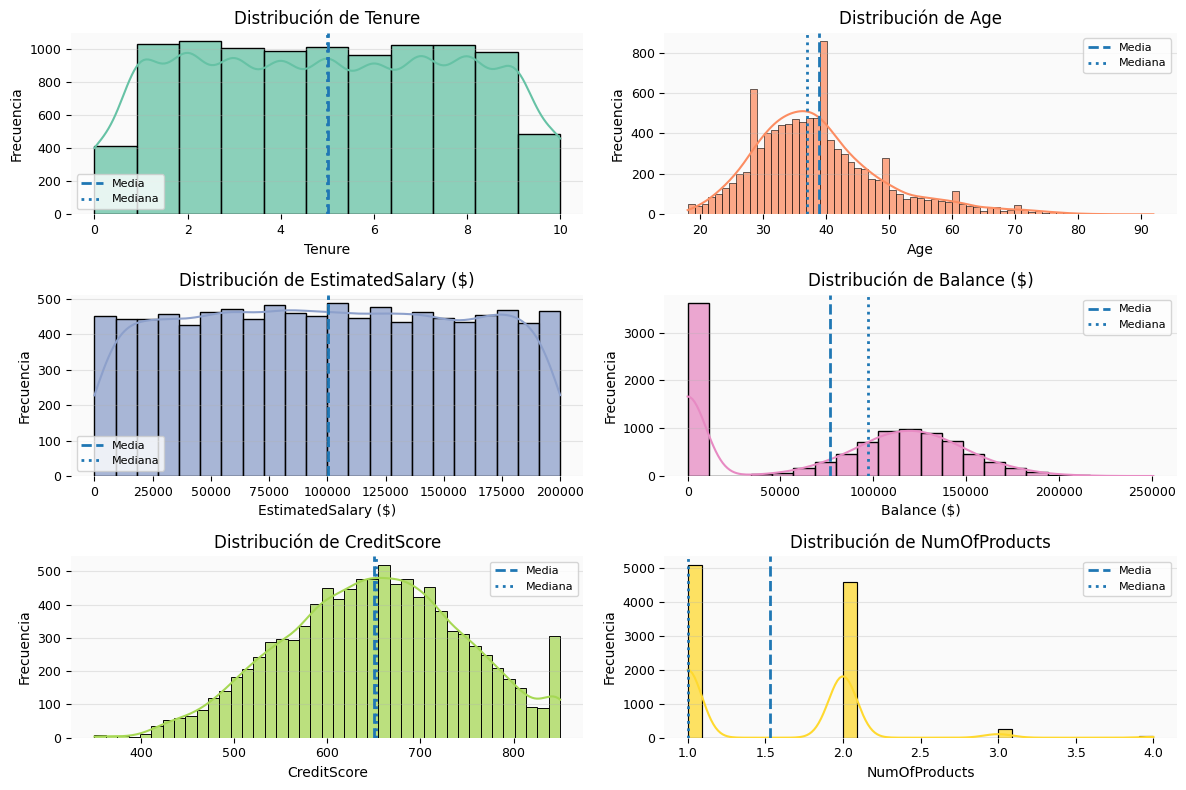

In [59]:
cols_num = ['EstimatedSalary', 'Balance', 'Tenure', 'CreditScore', 'Age','NumOfProducts']
for c in cols_num:
    datos[c] = pd.to_numeric(datos[c], errors='coerce')

variables_numericas = ['Tenure', 'Age', 'EstimatedSalary', 'Balance', 'CreditScore','NumOfProducts']
variables_con_dinero = ['EstimatedSalary', 'Balance']

plt.rcParams.update({
    "figure.figsize": (12, 8),
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
})

colores = sns.color_palette("Set2", len(variables_numericas))

n = len(variables_numericas)
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows, ncols)
axes = axes.flatten()

for i, col in enumerate(variables_numericas):

    serie = datos[col].dropna()

    # Bins inteligentes
    bins = 'fd' if col not in ['Tenure'] else serie.nunique()

    sns.histplot(
        serie,
        bins=bins,
        kde=True,
        color=colores[i],
        edgecolor='black',
        alpha=0.75,
        ax=axes[i]
    )


    axes[i].axvline(serie.mean(), linestyle='--', linewidth=2, label='Media')
    axes[i].axvline(serie.median(), linestyle=':', linewidth=2, label='Mediana')


    etiqueta_x = col.replace("_", " ")
    if col in variables_con_dinero:
        etiqueta_x += " ($)"

    axes[i].set_title(f'Distribución de {etiqueta_x}')
    axes[i].set_xlabel(etiqueta_x)
    axes[i].set_ylabel('Frecuencia')

    # Estética
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].set_facecolor('#fafafa')
    axes[i].legend(fontsize=8)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Distribución de Tenure (Antigüedad)**: Mide cuantos años ha sido el cliente parte de la institución.

La distribución es casi uniforme. Esto significa que hay una cantidad similar de clientes en casi todos los niveles de antigüedad (desde 1 hasta 9 años), con un ligero descenso en los extremos (0 y 10 años). La media y la mediana están casi exactamente en 5 años.

**Distribución de Age (Edad)**: Presenta un sesgo a la derecha (sesgo positivo). La mayoría de los clientes son jóvenes-adultos, concentrados entre los 30 y 45 años. Hay muy pocos clientes mayores de 70 años. La media (39 años) es mayor que la mediana (37 años) debido a las edades avanzadas que "tiran" del promedio.

**Distribución de EstimatedSalary (Salario Estimado)**: Mide el ingreso anual estimado del cliente.
Al igual que la antigüedad, esta es una distribución uniforme. No hay un nivel de salario que predomine sobre otros; hay tantos clientes ganando cerca de $25,000 como ganando $175,000. El promedio se sitúa justo en el centro, alrededor de los $100,000.

**Distribución de Balance (Saldo en cuenta)**: Mide cuánto dinero tiene el cliente en su cuenta.

Es una distribución bimodal o con un valor atípico masivo en cero. Un grupo enorme de clientes tiene un saldo de cero pesos.
El resto de los clientes siguen una distribución normal centrada cerca de los $120,000.

Debido a los muchos saldos en cero, la media ($76,000) es mucho menor que la mediana de los que sí tienen dinero.

**Distribución de CreditScore (Puntaje Crediticio)**: Mide la solvencia crediticia (qué tan confiable es el cliente para pagar préstamos).

Esta variable sigue una distribución normal (campana de Gauss) centrada alrededor de los 650 puntos. Sin embargo, hay un pico inusual al final (850 puntos), lo que sugiere que hay un grupo considerable de clientes con un historial crediticio "perfecto".

**Distribución de NumOfProducts (Número de Productos)**: Esta variable mide Cuántos servicios bancarios tiene contratados el cliente (ej. cuenta corriente, tarjeta, hipoteca).

Es una variable discreta. La gran mayoría de los clientes tienen 1 o 2 productos. Es muy raro encontrar clientes con 3 productos, y casi inexistente con 4. La mediana está en 1, pero el promedio sube a ~1.5 debido a los que tienen 2.

In [60]:
descripcion_Col_categorica = datos[['Gender']].describe().T


In [61]:
def plot_multiple_categorical(datos, columns, palettes=None, figsize=(5, 5), ncols=2):
    nplots = len(columns)
    nrows = (nplots + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    total = len(datos)

    for i, col in enumerate(columns):
        ax = axes[i]
        palette = palettes[i] if palettes and i < len(palettes) else 'muted'
        sns.countplot(data=datos, x=col, hue=col, palette=palette, legend=False, ax=ax)
        ax.set_facecolor('#f5f5f5')

        for p in ax.patches:
            altura = p.get_height()
            porcentaje = altura / total * 100
            texto = f'{altura}\n({porcentaje:.1f}%)'
            ax.annotate(
                texto,
                (p.get_x() + p.get_width() / 2., altura * 0.6),
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

        for label in ax.get_xticklabels():
            label.set_fontsize(8)
            if col == 'Metodo_de_pago':
                label.set_rotation(25)

        ax.set_title(f'Distribución de {col.replace("_", " ")}', fontsize=12)
        ax.set_xlabel(col.replace("_", " "), fontsize=10)
        ax.set_ylabel('Clientes', fontsize=10)
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()


## 1.2 Descripción Variables Categoricas

####  Descripcion de Churn y Gender

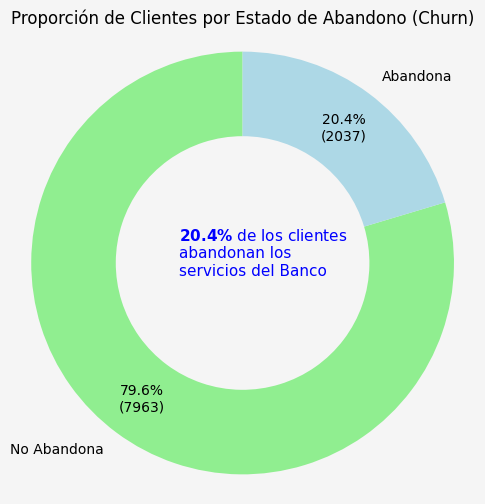

In [62]:
churn_counts = datos['Churn'].value_counts()
churn_percentages = datos['Churn'].value_counts(normalize=True) * 100
churn_rate = churn_percentages.get(1, 0)

churn_map = {0: 'No Abandona', 1: 'Abandona'}
labels_for_plot = [churn_map[idx] for idx in churn_counts.index]

def autopct_format_func(pct):
    total = sum(churn_counts)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val})'

fig, ax = plt.subplots(figsize=(6, 6), facecolor='#f5f5f5')

wedges, texts, autotexts = ax.pie(
    x=churn_counts,
    labels=labels_for_plot,
    autopct=autopct_format_func,
    colors=['lightgreen', 'lightblue'],
    startangle=90,
    textprops={'fontsize': 10},
    wedgeprops={'width': 0.4}
)

for autotext, wedge in zip(autotexts, wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    x = np.cos(np.deg2rad(angle)) * 0.8
    y = np.sin(np.deg2rad(angle)) * 0.8
    autotext.set_position((x, y))

texto = (
    "$\\bf{" + f"{churn_rate:.1f}" + "\\%}$ de los clientes\n"
    "abandonan los\n"
    "servicios del Banco"
)
ax.text(-0.3, 0.05, texto, ha='left', va='center', fontsize=11, color='blue')

plt.title('Proporción de Clientes por Estado de Abandono (Churn)', fontsize=12)
plt.axis('equal')
plt.show()

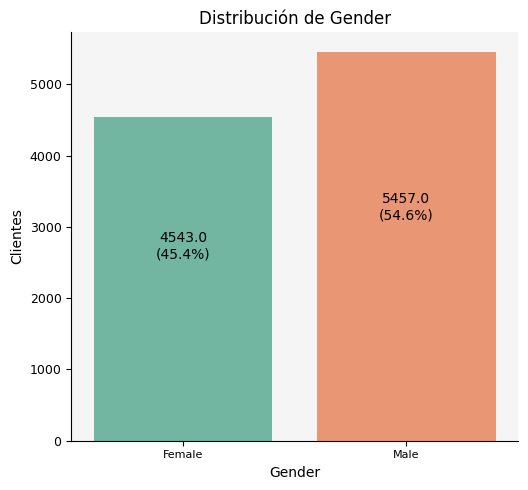

In [63]:
import matplotlib.ticker as ticker

cols = ['Gender',]
palettes = ['Set2']
plot_multiple_categorical(datos, cols, palettes, figsize=(10,5), ncols=2)

fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(datos[col].dropna().unique()))
    if valores_unicos == [0, 1]:
        if col == 'Gender':
            etiquetas = ['Female', 'Male']
        else:
            etiquetas = ['No', 'Sí']
        axes[i].xaxis.set_major_locator(ticker.FixedLocator(valores_unicos))
        axes[i].set_xticklabels(etiquetas)

plt.show()

El 54.6 % de loc clientes son hombres y el 45.4% son mujeres.

### Descripcion de IsActiveMember y HasCrCard

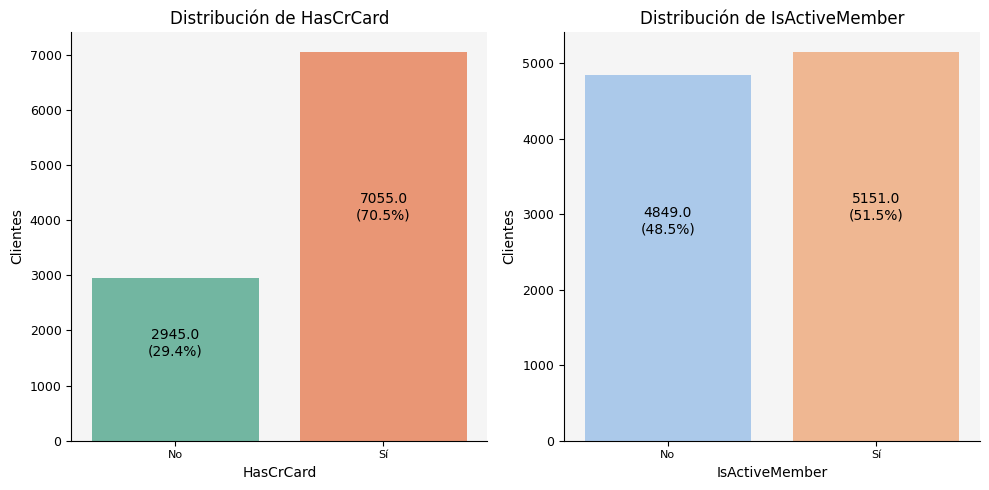

In [64]:
import matplotlib.ticker as ticker

cols = ['HasCrCard','IsActiveMember',]
palettes = ['Set2','pastel']
plot_multiple_categorical(datos, cols, palettes, figsize=(10,5), ncols=2)

fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(datos[col].dropna().unique()))
    if valores_unicos == [0, 1]:
        if col == 'Gender':
            etiquetas = ['Female', 'Male']
        else:
            etiquetas = ['No', 'Sí']
        axes[i].xaxis.set_major_locator(ticker.FixedLocator(valores_unicos))
        axes[i].set_xticklabels(etiquetas)

plt.show()

El 75.4% de los clientes tiene contratado tarjeta de credito y el 29.4 No tiene tarjeta de cerdito.

El 51.5% son clientes activos y el 48.5% son clientes inactivos.

# 2. Relaciones entre Variables y Churn

## Relacion entre Churn y Tenure

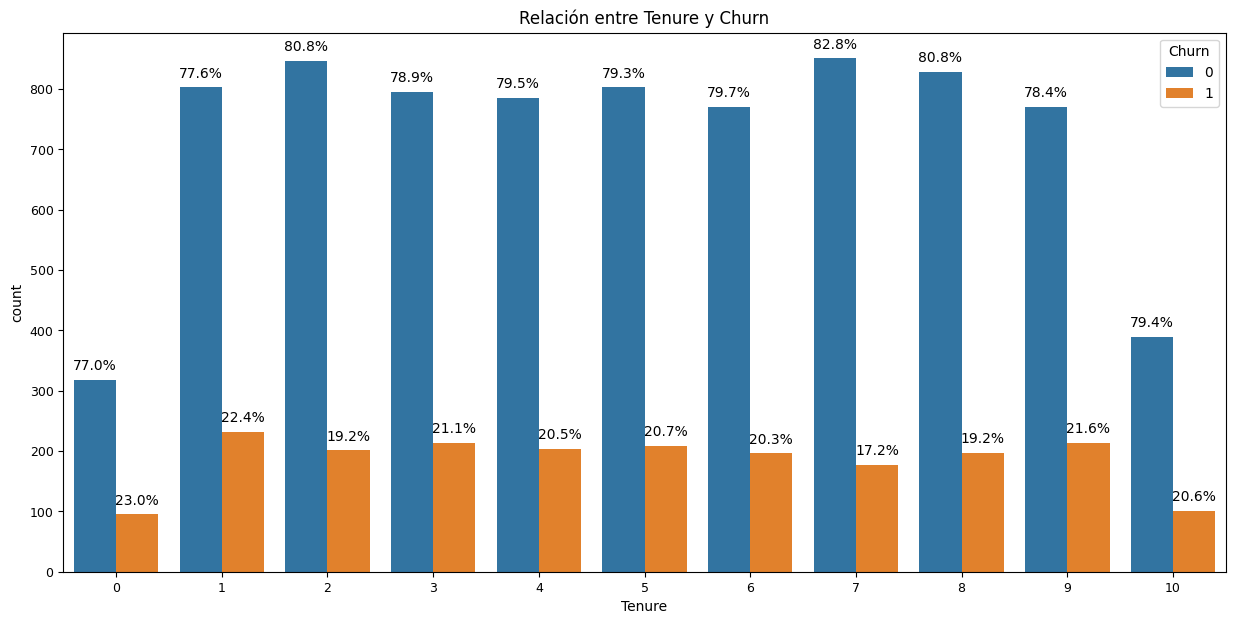

In [65]:

tenure_totals = datos.groupby('Tenure').size()


plt.figure(figsize=(15, 7))
ax = sns.countplot(data=datos, x='Tenure', hue='Churn', palette='tab10')

for p in ax.patches:
    height = p.get_height()
    if height > 0:

        tenure_idx = int(round(p.get_x() + (p.get_width() / 2)))

        total_por_anio = tenure_totals.iloc[tenure_idx]

        percentage = f'{(100 * height / total_por_anio):.1f}%'


        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=10, )

plt.title('Relación entre Tenure y Churn')
plt.show()

Este grafico expresa que la antiguedad no explica el abandono de clientes, ya que se observa una cifra similar entre los distintos peridos de permanencia en el banco, que va del 17.2% al 22.4%

## Relacion entre Churn y Edad

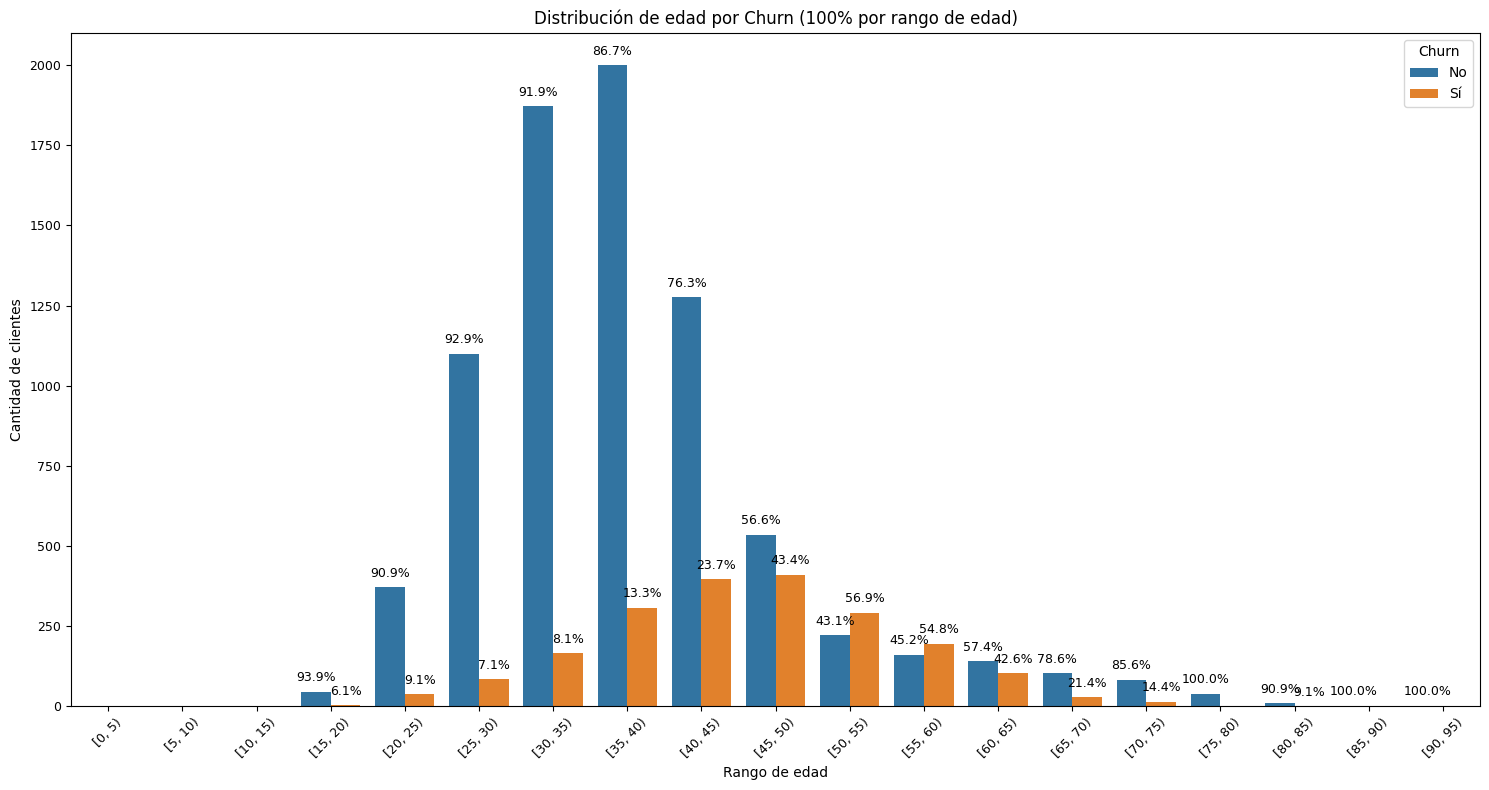

In [66]:

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
labels = [f"[{bins[i]}, {bins[i+1]})" for i in range(len(bins)-1)]
datos['Rango de edad'] = pd.cut(datos['Age'], bins=bins, labels=labels, right=False)


age_totals = datos.groupby('Rango de edad').size()


plt.figure(figsize=(15, 8))
ax = sns.countplot(data=datos, x='Rango de edad', hue='Churn', palette='tab10')


for p in ax.patches:
    height = p.get_height()
    if height > 0:

        age_idx = int(round(p.get_x() + (p.get_width() / 2)))


        total_rango = age_totals.iloc[age_idx]


        percentage = f'{(100 * height / total_rango):.1f}%'

        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=9,
                    rotation=0)

plt.title('Distribución de edad por Churn (100% por rango de edad)')
plt.xticks(rotation=45)
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

En los rangos de 20 a 40 años, la retención es muy alta. Por ejemplo, en el rango [30, 35), el 91.9% de los clientes permanece.

A partir de los 45 años, el comportamiento cambia drásticamente. En el rango [45, 50), el abandono sube al 43.4%.

**Mayoría de Abandono**: En los rangos de [50, 55) y [55, 60), la barra naranja (Sí) es más alta que la azul. El 56.9% y el 54.8% de los clientes en esas edades abandonan el banco, respectivamente.

En el rango [70, 75), el 85.6% de los clientes se queda.

## Relacion entre Genero y Churn

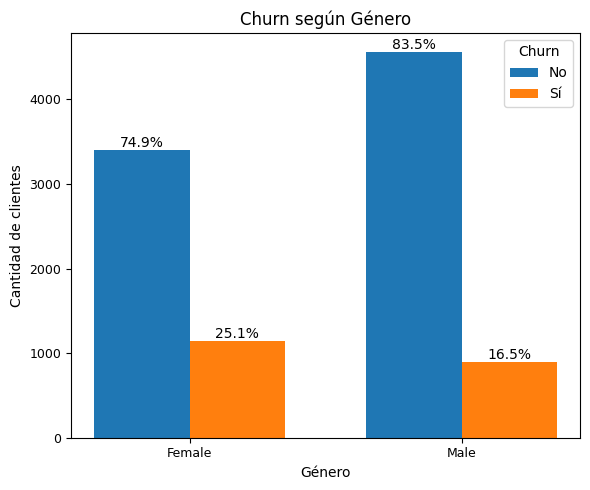

In [67]:
tabla = (
    datos
    .groupby(['Gender', 'Churn'])
    .size()
    .unstack(fill_value=0)
)


tabla = tabla.reindex(columns=[0, 1], fill_value=0)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6,5))

x = np.arange(len(tabla.index))
width = 0.35

bars_no = ax.bar(x - width/2, tabla[0], width, label='No')
bars_si = ax.bar(x + width/2, tabla[1], width, label='Sí')

# Etiquetas de porcentaje
for i, genero in enumerate(tabla.index):
    for churn, bars in zip([0, 1], [bars_no, bars_si]):
        valor = tabla.loc[genero, churn]
        pct = tabla_pct.loc[genero, churn]

        if valor == 0:
            continue

        ax.text(
            bars[i].get_x() + bars[i].get_width() / 2,
            bars[i].get_height(),
            f'{pct:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

# -------------------------------------------------
# 4. Ajustes finales
# -------------------------------------------------
ax.set_title('Churn según Género')
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de clientes')
ax.set_xticks(x)
ax.set_xticklabels(tabla.index)
ax.legend(title='Churn')

plt.tight_layout()
plt.show()


Este gráfico revela una brecha notable en la retención según el género:

**Mayor abandono en mujeres**: El segmento femenino tiene una tasa de churn del 25.1%. Hay aprox 3400 clientes mujeres.

**Mayor retención en hombres**: El segmento masculino muestra un comportamiento más fiel, con solo un 16.5% de abandono.Hay mas de 4000 clientes hombres.

Aunque hay una mayor cantidad total de clientes hombres en la base de datos, las mujeres tienen una probabilidad notablemente mayor de abandonar el servicio.

### Relacion entre Country y Churn

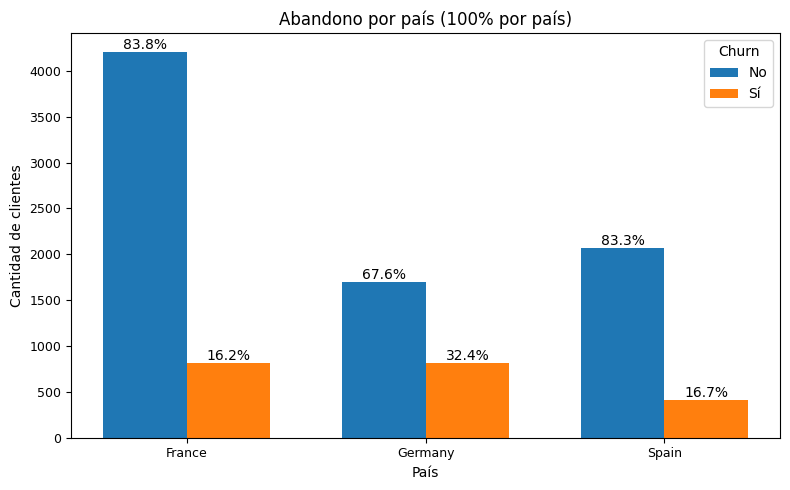

In [68]:
tabla = (
    datos
    .groupby(['Country', 'Churn'])
    .size()
    .unstack(fill_value=0)
)

tabla = tabla.reindex(columns=[0, 1], fill_value=0)


tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100


fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(len(tabla.index))
width = 0.35

bars_no = ax.bar(x - width/2, tabla[0], width, label='No')
bars_si = ax.bar(x + width/2, tabla[1], width, label='Sí')


for i, pais in enumerate(tabla.index):
    for churn, bars in zip([0, 1], [bars_no, bars_si]):
        valor = tabla.loc[pais, churn]
        pct = tabla_pct.loc[pais, churn]

        if valor == 0:
            continue

        ax.text(
            bars[i].get_x() + bars[i].get_width() / 2,
            bars[i].get_height(),
            f'{pct:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

ax.set_title('Abandono por país (100% por país)')
ax.set_xlabel('País')
ax.set_ylabel('Cantidad de clientes')
ax.set_xticks(x)
ax.set_xticklabels(tabla.index)
ax.legend(title='Churn')

plt.tight_layout()
plt.show()

**Abandono por País**

El dato más relevante es que el riesgo de abandono en Alemania es el doble que en Francia o España.

**Alemania (Punto Crítico)**: Presenta la tasa de abandono más alta con un 32.4%. Esto significa que casi 1 de cada 3 clientes alemanes deja la empresa.

**Francia y España (Estables)**: Ambos países muestran un comportamiento muy similar y más saludable, con tasas de abandono del 16.2% y 16.7% respectivamente.

**Conclusión**: El país de residencia es un factor determinante en la fuga de clientes.

## Relacion entre Credit Score y Churn

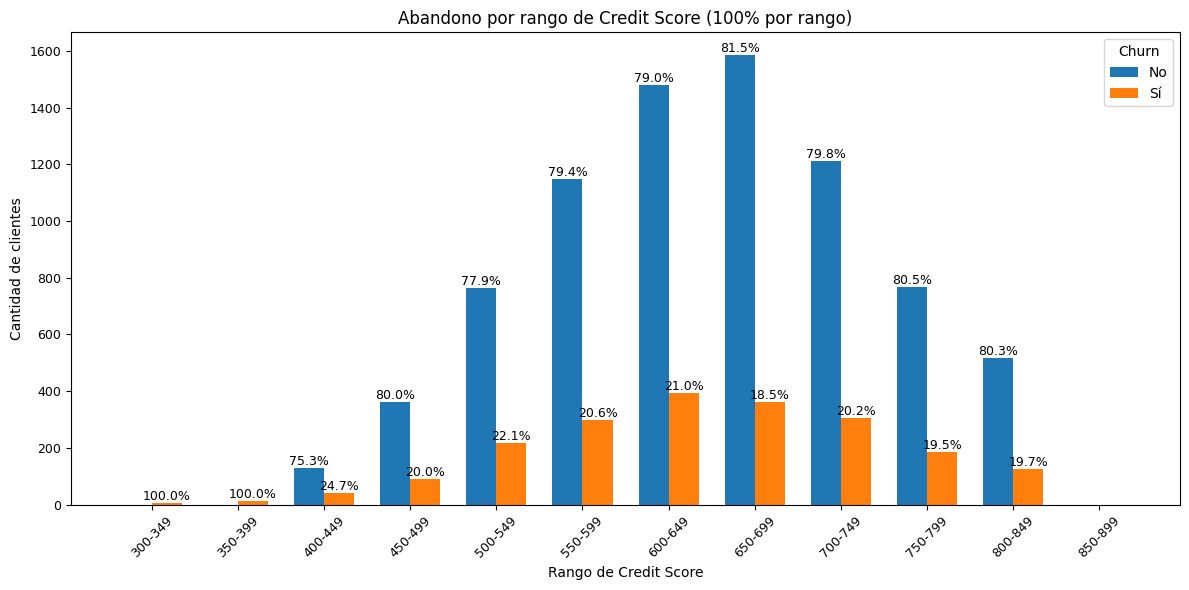

In [69]:
bins = np.arange(300, 901, 50)
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

datos['CreditScore_rango'] = pd.cut(
    datos['CreditScore'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


tabla = (
    datos
    .groupby(['CreditScore_rango', 'Churn'])
    .size()
    .unstack(fill_value=0)
)


tabla = tabla.reindex(columns=[0, 1], fill_value=0)


tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100


fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(tabla.index))
width = 0.35

bars_no = ax.bar(x - width/2, tabla[0], width, label='No')
bars_si = ax.bar(x + width/2, tabla[1], width, label='Sí')


for i, rango in enumerate(tabla.index):
    for churn, bars in zip([0, 1], [bars_no, bars_si]):
        valor = tabla.loc[rango, churn]
        pct = tabla_pct.loc[rango, churn]

        if valor == 0:
            continue

        ax.text(
            bars[i].get_x() + bars[i].get_width() / 2,
            bars[i].get_height(),
            f'{pct:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )


ax.set_title('Abandono por rango de Credit Score (100% por rango)')
ax.set_xlabel('Rango de Credit Score')
ax.set_ylabel('Cantidad de clientes')
ax.set_xticks(x)
ax.set_xticklabels(tabla.index, rotation=45)
ax.legend(title='Churn')

plt.tight_layout()
plt.show()

**¿Influye la solvencia crediticia en la probabilidad de que un cliente deje la empresa?**
El gráfico sugiere que el Credit Score no es un factor determinante o diferenciador para el abandono. Un cliente con un puntaje de 800 tiene casi la misma probabilidad de irse (19.7%) que uno con un puntaje de 500 (22.1%).

Esto implica que, si la empresa quiere reducir el abandono, no debería enfocarse en el perfil crediticio, sino buscar otras causas como la calidad del servicio, el precio o la competencia, ya que el comportamiento de fuga es uniforme en casi todos los niveles de crédito.

## Relacion entre NumOfProducts y Churn

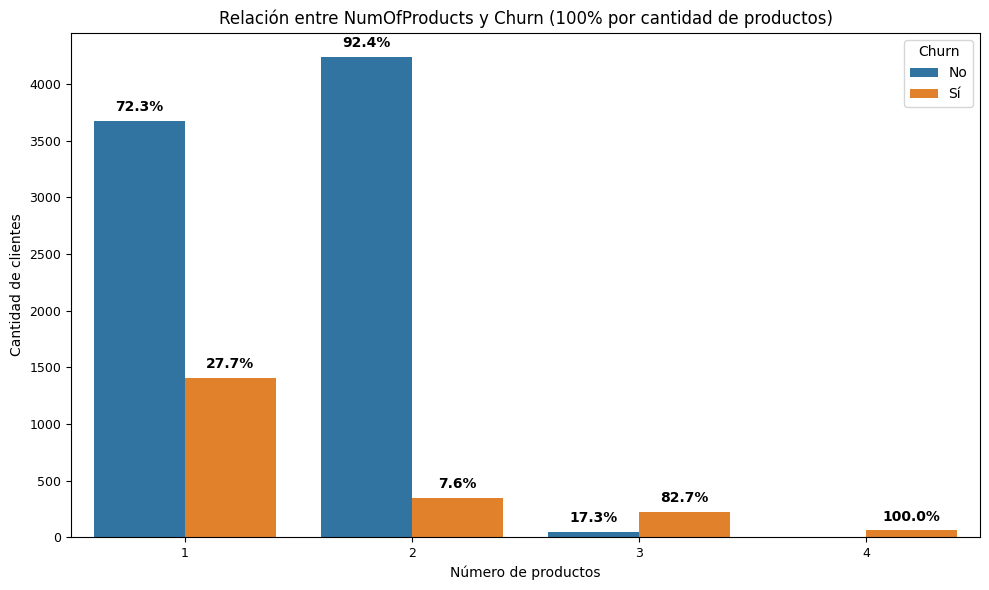

In [70]:
prod_totals = datos.groupby('NumOfProducts').size()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=datos, x='NumOfProducts', hue='Churn', palette='tab10')

for p in ax.patches:
    height = p.get_height()
    if height > 0:

        prod_idx = int(round(p.get_x() + (p.get_width() / 2)))

        total_grupo = prod_totals.iloc[prod_idx]


        percentage = f'{(100 * height / total_grupo):.1f}%'

        # Anotar el porcentaje sobre la barra correspondiente
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=10,
                    fontweight='bold')

plt.title('Relación entre NumOfProducts y Churn (100% por cantidad de productos)')
plt.xlabel('Número de productos')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

**Máxima Fidelidad**: Los clientes con 2 productos son los más leales, con una tasa de retención del 92.4%.
 Solo el 7.6% de estos clientes decide abandonar la empresa. Este es el segmento más estable de toda la cartera.

**Riesgo Moderado (1 Producto)**:Los clientes que solo tienen 1 producto presentan una probabilidad mucho mayor de irse (27.7%) en comparación con los que tienen dos.
Aunque el porcentaje de abandono es moderado, es preocupante porque representa a una gran cantidad de clientes en términos absolutos.

**Zona de Alerta Crítica (3 y 4 Productos)**: En este punto, la relación se invierte de forma alarmante.

**3 Productos**: El abandono se dispara al 82.7%. Solo una pequeña fracción (17.3%) permanece con la empresa.

**4 Productos**: El riesgo es total. El 100.0% de los clientes identificados con 4 productos han abandonado la empresa.

**1 Producto**: Aunque es el segundo grupo más grande, los clientes con solo 1 producto tienen una tasa de abandono significativa. Esto sugiere que un solo producto no es suficiente para "fidelizar" al cliente de manera sólida.

**2 Productos**:Los clientes que poseen 2 productos son los más leales y rentables para la empresa. Tienen la mayor cantidad de clientes que se quedan (barra azul más alta).
La proporción de abandono (barra naranja) es extremadamente baja en comparación con los que se quedan.

**3 Productos**: La barra naranja es mucho más alta que la azul. Esto significa que la mayoría de los clientes con 3 productos deciden irse.

**4 Productos**: El abandono es prácticamente del 100%. No hay barras azules visibles, lo que indica que tener demasiados productos en este contexto está correlacionado con la pérdida total del cliente.

El banco parece tener un problema grave de "sobre-venta" o de mala experiencia de servicio cuando un cliente adquiere más de dos productos. Mientras que **tener dos productos asegura al cliente, subir a tres o cuatro garantiza su salida**.

## Relación entre HasCrCard y Churn

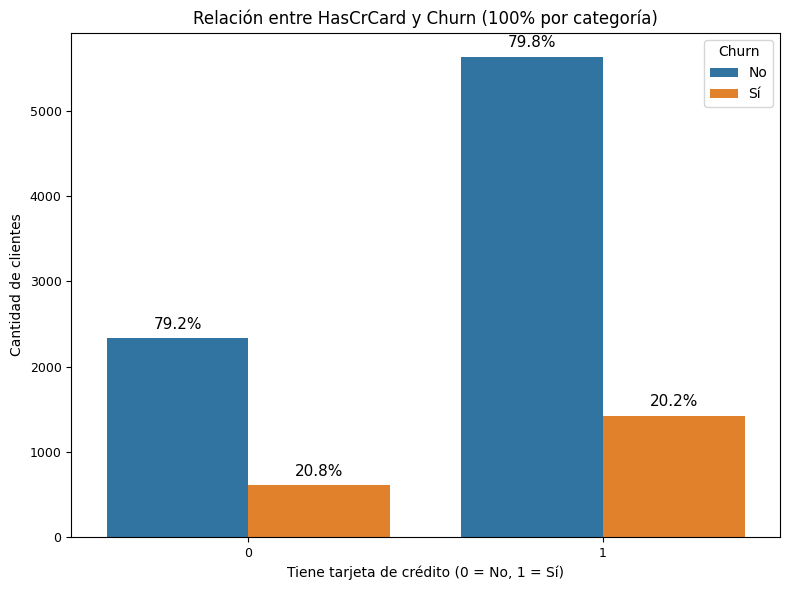

In [71]:
card_totals = datos.groupby('HasCrCard').size()

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=datos, x='HasCrCard', hue='Churn', palette='tab10')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Identificar la categoría en el eje X (0 o 1)
        card_idx = int(round(p.get_x() + (p.get_width() / 2)))

        total_grupo = card_totals.iloc[card_idx]

        percentage = f'{(100 * height / total_grupo):.1f}%'

        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=11,
                    )

plt.title('Relación entre HasCrCard y Churn (100% por categoría)')
plt.xlabel('Tiene tarjeta de crédito (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

**Neutralidad del Factor**: Poseer una tarjeta de crédito no parece ser un factor determinante para que un cliente decida irse o quedarse.

Para los clientes sin tarjeta, el abandono es del 20.8%.

Para los clientes con tarjeta, el abandono es casi idéntico: 20.2%.

La diferencia de apenas 0.6% entre ambos grupos indica que tener este producto financiero no genera una mayor lealtad ni reduce significativamente el riesgo de fuga.

## Relación entre IsActiveMember y Churn

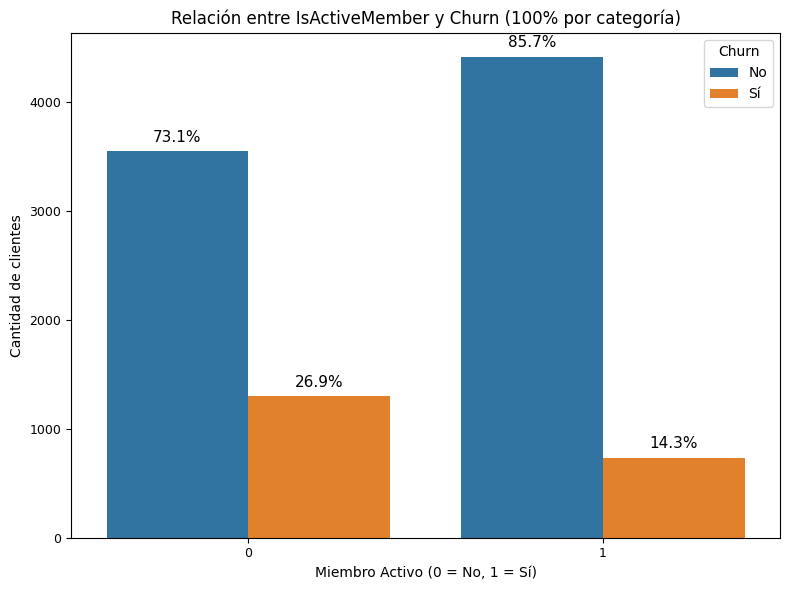

In [72]:
active_totals = datos.groupby('IsActiveMember').size()


plt.figure(figsize=(8, 6))
ax = sns.countplot(data=datos, x='IsActiveMember', hue='Churn', palette='tab10')


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        active_idx = int(round(p.get_x() + (p.get_width() / 2)))

        total_grupo = active_totals.iloc[active_idx]

        percentage = f'{(100 * height / total_grupo):.1f}%'

        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=11,
                    )

plt.title('Relación entre IsActiveMember y Churn (100% por categoría)')
plt.xlabel('Miembro Activo (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

**Miembros Inactivos (0)**: Presentan la tasa de abandono más alta de esta categoría, con un 26.9%. Esto sugiere que más de una cuarta parte de los clientes que no interactúan regularmente con los servicios terminan cancelando.

**Miembros Activos (1)**: Tienen una tasa de abandono significativamente menor, de solo el 14.3%. La actividad es un fuerte escudo contra la fuga de clientes, reduciendo el riesgo casi a la mitad en comparación con los inactivos.

# 3. Visualizacion del Churn

En este punto  determinará cuales son las variables que influyen en el abandono de clientes (Churn)

A partir de ahora las columnas se identificaran como variables , ya que se debe determinar cual o cuales intervienen en el abandono de los clientes (churn)

### Descripcion Estadistica de Variables Numericas

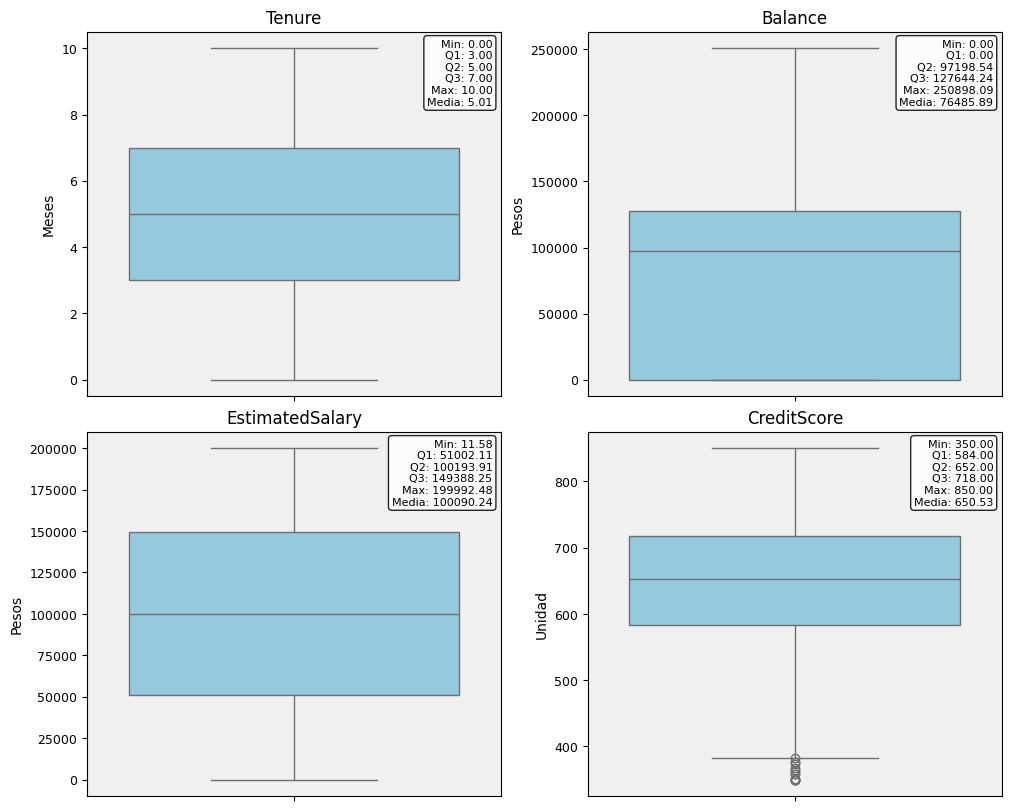

In [73]:
columnas = ['Tenure', 'Balance', 'EstimatedSalary', 'CreditScore']

etiquetas_y = {
    'Tenure': 'Meses',
    'EstimatedSalary': 'Pesos',
    'Balance': 'Pesos',
    'CreditScore': 'Unidad'
}
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.boxplot(y=datos[col], ax=axes[i], color='skyblue')  # Cambio aquí
    axes[i].set_title(col)
    axes[i].set_ylabel(etiquetas_y[col])
    axes[i].grid(False)

    axes[i].set_facecolor('#f0f0f0')

    stats = datos[col].describe()
    texto = (
        f"Min: {stats['min']:.2f}\n"
        f"Q1: {stats['25%']:.2f}\n"
        f"Q2: {stats['50%']:.2f}\n"
        f"Q3: {stats['75%']:.2f}\n"
        f"Max: {stats['max']:.2f}\n"
        f"Media: {stats['mean']:.2f}"
    )

    axes[i].text(
        0.98, 0.98, texto,
        ha='right', va='top',
        transform=axes[i].transAxes,
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.85, boxstyle='round')
    )

plt.show()

In [74]:
#Descripcion estadistica de Columnas Numericas

descripcion_Col_numerica = datos[['Tenure', 'CreditScore', 'EstimatedSalary', 'Balance']].describe().T
descripcion_Col_numerica

,count,mean,std,min,25%,50%,75%,max
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09


###  Analisis de Correlacion para todas las variables.

Cada celda en la matriz representa el coeficiente de correlación de Pearson entre dos variables. Este coeficiente varía entre: 0.0 y 1.0

El valor 0.0 significa que no existe correlacion entre variables  y el valor 1.0, indica que hay una fuerte correlacion, es decir hay una incidencia de esta variable con la variable en estudio.

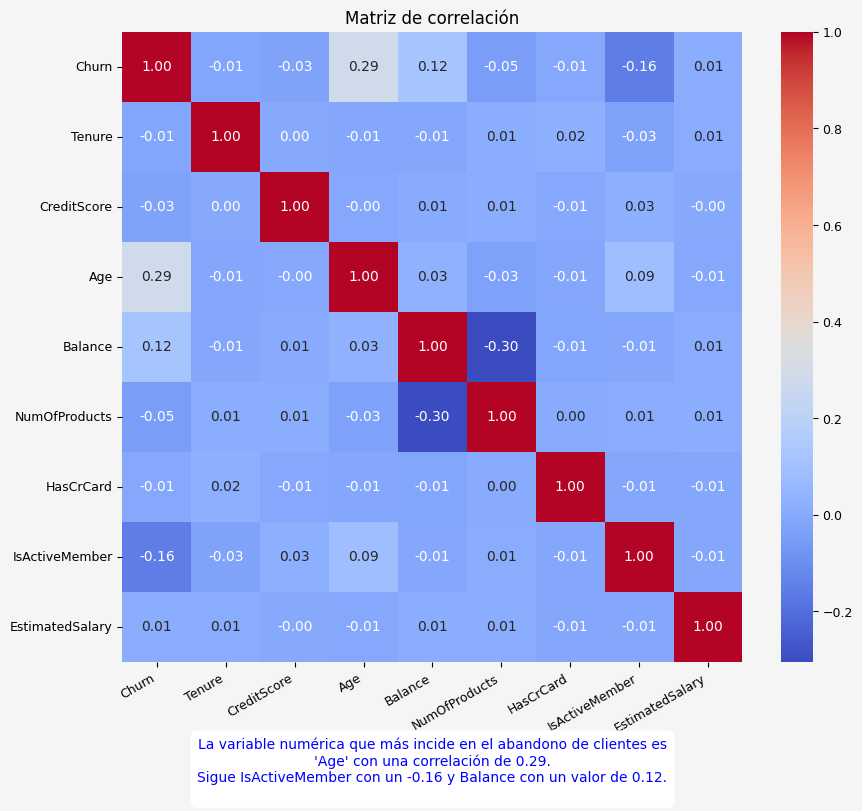

In [75]:
datos['Churn'] = datos['Churn'].astype(int)

variables = ['Churn', 'Tenure',
             'CreditScore','Age',	'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
correlaciones = datos[variables].corr()

plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_facecolor('#f5f5f5')
plt.gca().set_facecolor('#f5f5f5')
plt.gcf().set_facecolor('#f5f5f5')
plt.xticks(rotation=30, ha='right', fontsize=9)
plt.title("Matriz de correlación")

plt.subplots_adjust(bottom=0.25)

plt.text(
    0.5, -0.12,
    (
        "La variable numérica que más incide en el abandono de clientes es\n"
        "'Age' con una correlación de 0.29.\n"
         "Sigue IsActiveMember con un -0.16 y Balance con un valor de 0.12.\n"
    ),
    ha='center', va='top',
    fontsize=10, color='blue',
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'),
    transform=plt.gca().transAxes
)
plt.show()

# Relacion entre Variables y Churn.

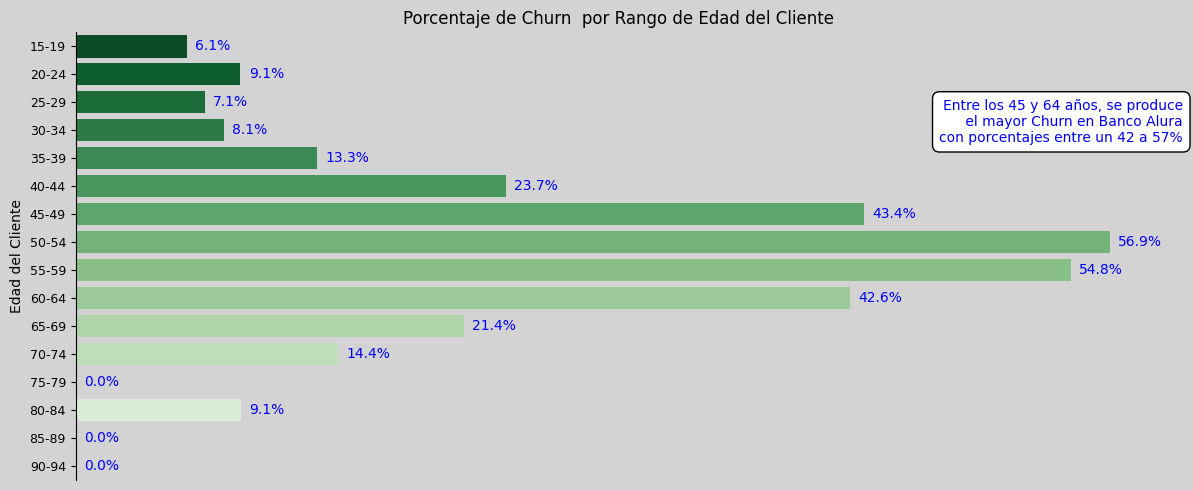

In [76]:
bins = np.arange(0, datos['Age'].max() + 6, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

datos['Age_rango'] = pd.cut(
    datos['Age'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

datos['Age_rango'] = datos['Age_rango'].cat.remove_unused_categories()

churn_counts = pd.crosstab(datos['Age_rango'], datos['Churn'])
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

percentage_churned = churn_percentages[1].sort_index()

colors = sns.color_palette("Greens", len(percentage_churned))[::-1]
paleta = dict(zip(percentage_churned.index.astype(str), colors))

# 5. Gráfico

fig, ax = plt.subplots(figsize=(12, 5), facecolor='lightgrey')
ax.set_facecolor('lightgrey')

sns.barplot(
    x=percentage_churned.values,
    y=percentage_churned.index.astype(str),
    palette=paleta,
    ax=ax
)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Edad del Cliente', fontsize=10)
ax.set_title(
    'Porcentaje de Churn  por Rango de Edad del Cliente',
    fontsize=12
)
ax.set_xticks([])


for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.1f}%',
        xy=(p.get_width(), p.get_y() + p.get_height() / 2),
        xytext=(6, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=10,
        color='blue'
    )
ax.text(1.02, 0.8,
        'Entre los 45 y 64 años, se produce\n el mayor Churn en Banco Alura\n'
        'con porcentajes entre un 42 a 57%',
        transform=ax.transAxes,
        fontsize=10,
        color='blue',
        ha='right',
        va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

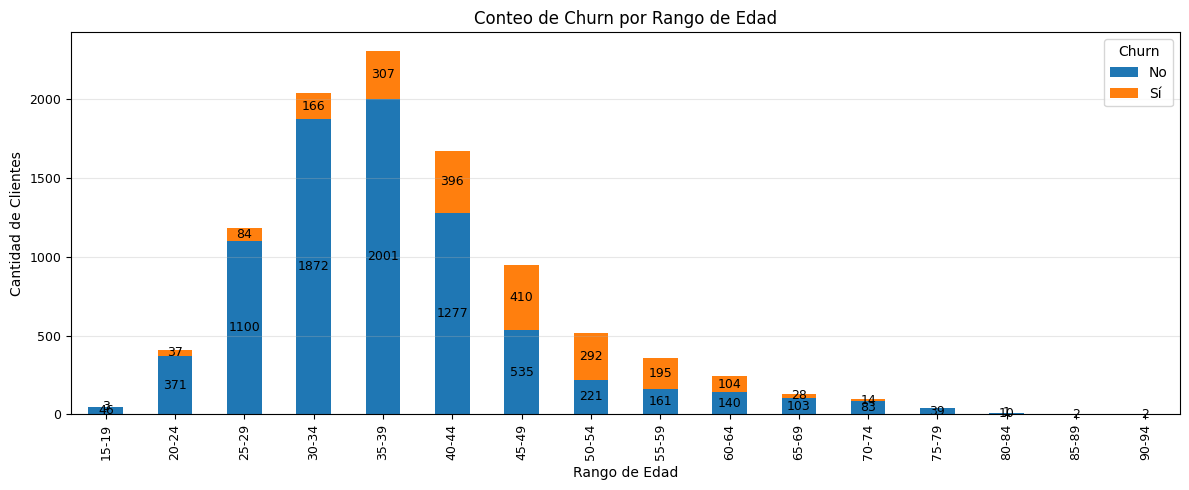

In [77]:
tabla_conteo = pd.crosstab(datos['Age_rango'], datos['Churn'])

# Gráfico


ax = tabla_conteo.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 5),

)

# Títulos y etiquetas
ax.set_title('Conteo de Churn por Rango de Edad')
ax.set_xlabel('Rango de Edad')
ax.set_ylabel('Cantidad de Clientes')
ax.legend(title='Churn', labels=['No', 'Sí'])
ax.grid(axis='y', alpha=0.3)

for i, rango in enumerate(tabla_conteo.index):
    acumulado = 0
    for churn_val in tabla_conteo.columns:
        valor = tabla_conteo.loc[rango, churn_val]

        if valor > 0:  # evitar texto en ceros
            ax.text(
                i,
                acumulado + valor / 2,
                str(valor),
                ha='center',
                va='center',
                fontsize=9,
                color='black',

            )
        acumulado += valor

plt.tight_layout()
plt.show()

Relacion entre IsActivemembers con Churn

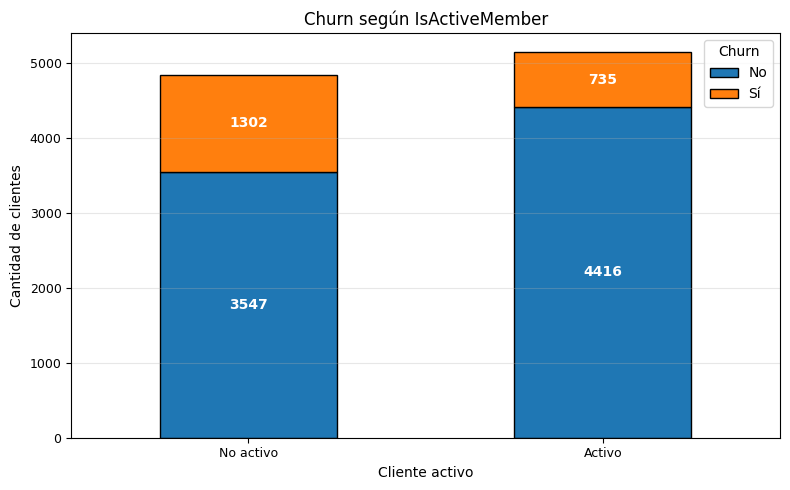

In [78]:
tabla = pd.crosstab(datos['IsActiveMember'], datos['Churn'])

ax = tabla.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    edgecolor='black'
)

ax.set_title('Churn según IsActiveMember')
ax.set_xlabel('Cliente activo')
ax.set_ylabel('Cantidad de clientes')
ax.set_xticklabels(['No activo', 'Activo'], rotation=0)
ax.legend(title='Churn', labels=['No', 'Sí'])
ax.grid(axis='y', alpha=0.3)


for i, fila in enumerate(tabla.index):
    acumulado = 0
    for col in tabla.columns:
        valor = tabla.loc[fila, col]
        if valor > 0:
            ax.text(
                i,
                acumulado + valor / 2,
                str(valor),
                ha='center',
                va='center',
                fontsize=10,
                color='white',
                fontweight='bold'
            )
        acumulado += valor

plt.tight_layout()
plt.show()


## **Relacion del Churn con Variables Numericas**

**Relacion entre Churn y Balance**

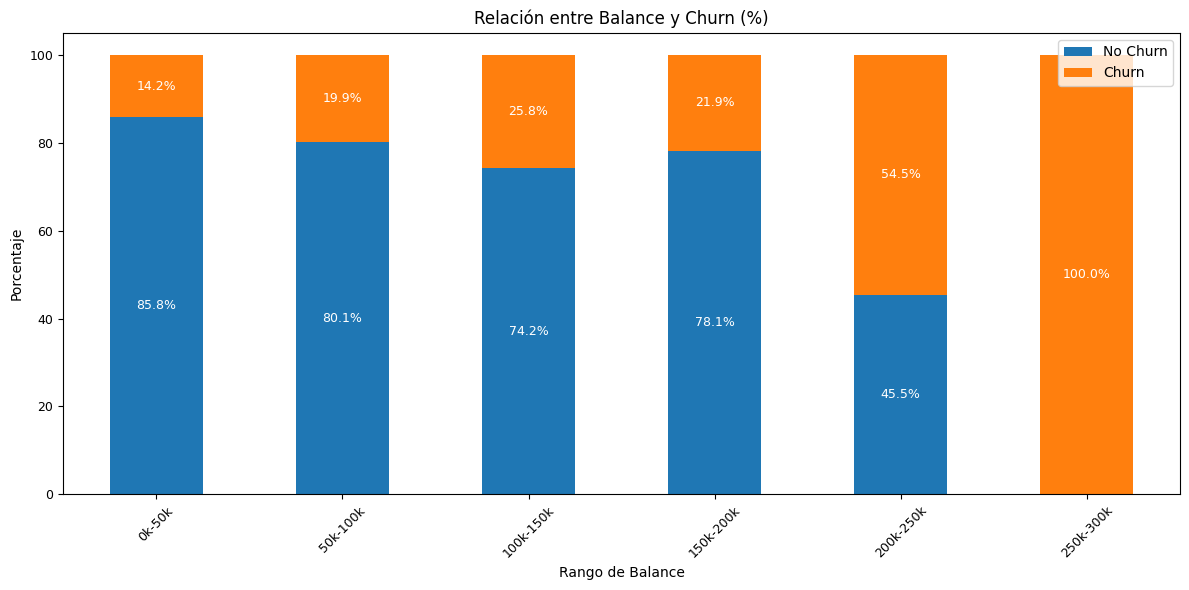

In [79]:

bins = np.arange(0, datos['Balance'].max() + 50000, 50000)
labels = [f'{int(b/1000)}k-{int((b+50000)/1000)}k' for b in bins[:-1]]

datos['Balance_rango'] = pd.cut(
    datos['Balance'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

tabla = (
    datos
    .groupby(['Balance_rango', 'Churn'])
    .size()
    .unstack(fill_value=0)
)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

ax = tabla_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title('Relación entre Balance y Churn (%)')
plt.xlabel('Rango de Balance')
plt.ylabel('Porcentaje')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)


for i, idx in enumerate(tabla_pct.index):
    acumulado = 0
    for churn in tabla_pct.columns:
        valor = tabla_pct.loc[idx, churn]
        if valor > 0:
            ax.text(
                i,
                acumulado + valor / 2,
                f'{valor:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='white'
            )
            acumulado += valor

plt.tight_layout()
plt.show()

Vemos una correlación clara: a mayor dinero en la cuenta, mayor es la probabilidad de que el cliente se vaya.

**Segmento de bajo saldo (0k-50k)**: Es el más leal, con solo un 14.2% de abandono.

**Segmento intermedio (100k-150k)**: El riesgo sube significativamente al 25.8%.

**Segmento de alto valor (200k-250k)**: Aquí la situación es alarmante; más de la mitad de los clientes (54.5%) abandonan el banco.

El banco tiene un problema de retención de clientes Premium.

**Esta variable esta ligada directamente con el Churn**

**Relacion del Churn con EstimatedSalary**

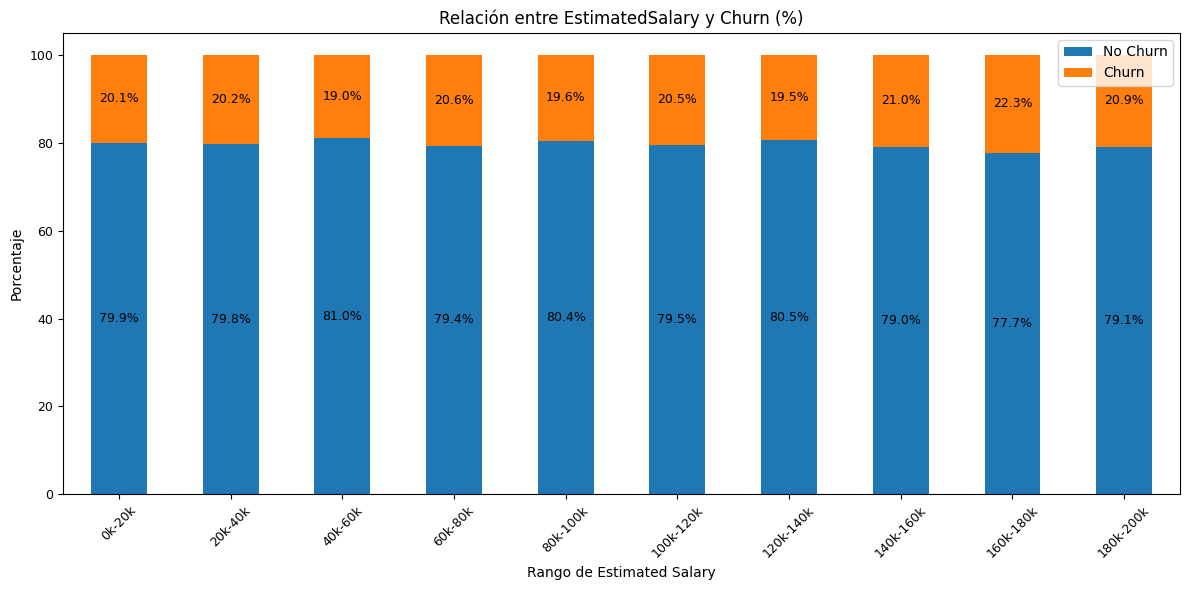

In [80]:
bins = np.arange(0, datos['EstimatedSalary'].max() + 20000, 20000)
labels = [f'{int(b/1000)}k-{int((b+20000)/1000)}k' for b in bins[:-1]]

datos['Salary_rango'] = pd.cut(
    datos['EstimatedSalary'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

tabla = (
    datos
    .groupby(['Salary_rango', 'Churn'])
    .size()
    .unstack(fill_value=0)
)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

ax = tabla_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title('Relación entre EstimatedSalary y Churn (%)')
plt.xlabel('Rango de Estimated Salary')
plt.ylabel('Porcentaje')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)


for i, idx in enumerate(tabla_pct.index):
    acumulado = 0
    for churn in tabla_pct.columns:
        valor = tabla_pct.loc[idx, churn]
        if valor > 0:
            ax.text(
                i,
                acumulado + valor / 2,
                f'{valor:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
            acumulado += valor

plt.tight_layout()
plt.show()

La observación más importante es la uniformidad de los datos. Independientemente de cuánto gane el cliente, el porcentaje de abandono se mantiene sumamente estable:

La tasa de No Churn (clientes que se quedan) oscila muy cerca del 80% en todos los segmentos. La tasa de Churn (clientes que se van) se mantiene constantemente alrededor del 20%.

Este gráfico sugiere que el salario no es un predictor relevante para el Churn en este conjunto de datos: Un cliente que gana poco tiene prácticamente la misma probabilidad de irse que uno que gana mucho.

**No hay una influencia de esta variable en el Churn**

<font color=blue size = 6>**CONCLUSIONES**</font>

La distribución del dinero es muy similar entre los que se van y los que se quedan. Esto sugiere que el nivel de dinero en la cuenta no es el factor determinante para el abandono, ya que tanto clientes ricos como clientes con balance 0 se van en proporciones parecidas.

El perfil del cliente con más riesgo de irse es alguien de entre 50 y 59 años, y el hecho de que tenga mucho o poco dinero en su cuenta no parece evitar que abandone el servicio, lo cual sugiere que el motivo del Churn podría estar más relacionado con la atención al cliente o el tipo de producto que con su situación financiera.

<font color=blue size = 5>**3. Insigths Encontrados**</font>

<font color=blue size = 4> Variables que inciden en el Churn</font>

**Tenure:** Se observa la antiguedad no es un factor que incide en el chrn de los clientes, ya que este se mentiene estables entre los distintos periodos de permanenecia en el banco. **No interviene en el churn**

**Age:**: En los rangos de [50, 55) y [55, 60), la barra naranja (Sí) es más alta que la azul. El 56.9% y el 54.8% de los clientes en esas edades abandonan el banco, respectivamente. **Esta variable interviene en el Churn.**

**Gender:**Hay Mayor abandono en mujeres, con una tasa de churn del 25.1%. En el segmento masculino muestra un comportamiento más fiel, con solo un 16.5% de abandono. **El genero del cliente tiene incidencia en el Churn.**

**Country:** El dato más relevante es que el riesgo de abandono en Alemania es el doble que en Francia o España. **Interviene en el Churn**

**CreditScore**: El Credit Score no es un factor determinante o diferenciador para el abandono. Un cliente con un puntaje de 800 tiene casi la misma probabilidad de irse (19.7%) que uno con un puntaje de 500 (22.1%).**No interviene en el Churn**

**NumbersOfProducts**:El banco parece tener un problema grave de "sobre-venta" o de mala experiencia de servicio cuando un cliente adquiere más de dos productos. Mientras que tener dos productos asegura al cliente, subir a tres o cuatro garantiza su salida.  **Tiene un efecto claro en el Churn.**

**HasCrCard**:Poseer una tarjeta de crédito no parece ser un factor determinante para que un cliente decida irse o quedarse. Para los clientes sin tarjeta, el abandono es del 20.8%. Para los clientes con tarjeta, el abandono es casi idéntico: 20.2%. **No tiene un efecto en el Churn.**

**IsActivemember**:Los miembros inactivos presentan la tasa de abandono más alta de esta categoría, con un 26.9%, en comparacion a los miembros activos que tenen una tasa de abandono significativamente menor, de solo el 14.3%.**Aparentemente esta variable tiene efecto en el Churn.**

**Balance**: Se observa que clientes con saldo bajos tienen menos churn y clientes con saldos altos tienen un mayor churn. **Esta variable incide directamente en el Churn de clientes.**

** EstimatedSalary:**  Se observa que el churn no incide en esta variable, ya es constante entre los diferentes segmentos de salarios. Por cuanto, **esta variable no incide en el churn**

En consecuencias, las variable que intervienen en el Churn, son:

- Age
- Gender
- Country
- NumberOfProducts
- IsActiveMember
- Balance


# **Relaciones entre variables que inciden en el Churn**

**Relacion entre Edad, Genero y Churn**

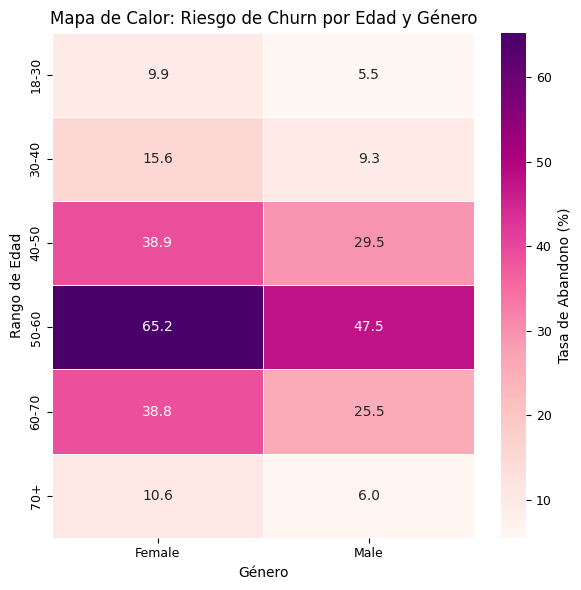

In [81]:
bins = [18, 30, 40, 50, 60, 70, 95]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70+']
datos['Age_bin'] = pd.cut(datos['Age'], bins=bins, labels=labels)

tabla_gender = pd.pivot_table(
    datos,
    values='Churn',
    index='Age_bin',
    columns='Gender',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_gender,
    cmap='RdPu',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por Edad y Género')
plt.xlabel('Género')
plt.ylabel('Rango de Edad')

plt.tight_layout()
plt.show()

Se observa un mayor churn en mujeres entre 40 a 70 años (38.8 a 65.2%).

Para hombres, el mayor churn es entre 50 y 60 años , con un 47.5%

**Relacion entre Churn, Edad y Pais**

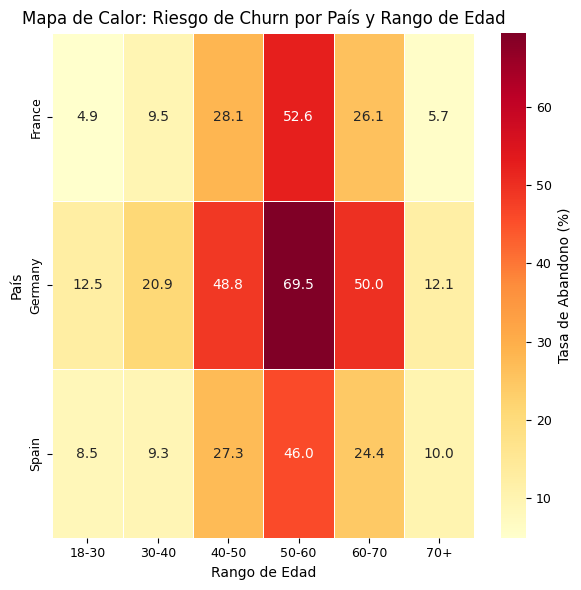

In [82]:
import pandas as pd
import seaborn as sns


bins = [18, 30, 40, 50, 60, 70, 95]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70+']
datos['Age_bin'] = pd.cut(datos['Age'], bins=bins, labels=labels)

tabla_country_age = pd.pivot_table(
    datos,
    values='Churn',
    index='Country',
    columns='Age_bin',
    aggfunc='mean'
) * 100


plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_country_age,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por País y Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('País')

plt.tight_layout()
plt.show()

Las edades entre 40 y 70 años presentan mayor churn, siendo entre 50 y 60 años para Alemania un churn de 69.5% , luego Francia con un 52.6% para el mismo tramo de edad.

Para el tramo entre 40 y 50 años, Alemania presenta un 48.8% de churn , seguido de España con un 28.1 y Francia con un 27.3%.

Para el tramo 60 a 70 años, se repite algo similar, Alemania con un churn de 50%, Francia, un 26.1 y España un 24.4%.





**Relacion entre Edad, Numero de productos y Churn**

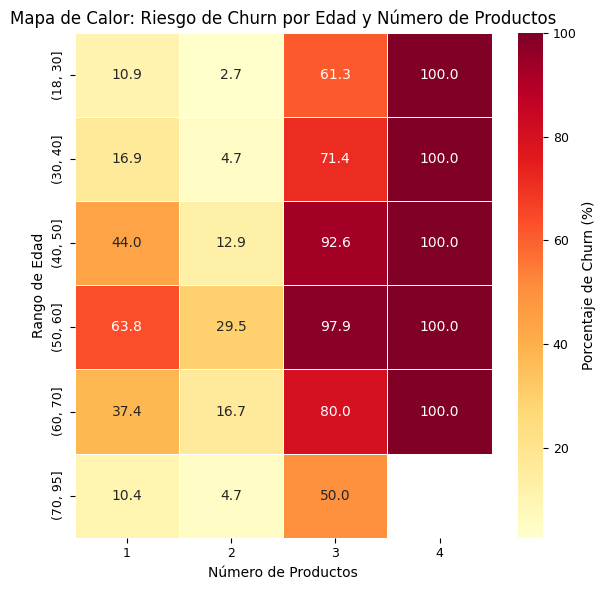

In [83]:
datos['Age_bin'] = pd.cut(datos['Age'], bins=[18, 30, 40, 50, 60, 70, 95])

tabla = pd.pivot_table(
    datos,
    values='Churn',
    index='Age_bin',
    columns='NumOfProducts',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Porcentaje de Churn (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por Edad y Número de Productos')
plt.xlabel('Número de Productos')
plt.ylabel('Rango de Edad')

plt.tight_layout()
plt.show()

Este gráfico confirma que el Número de Productos es el predictor de abandono más potente, pero su efecto se ve peligrosamente multiplicado por la Edad.

**Cualquier edad y con 4 productos hay un 100% de Churn**
Edad entre 50 a 60 años y 3 productos hay un 97,9% de churn. En esta misma edad con 1 producto , tiene un 63,8% de Churn.

**Relacion Churn, IsActiveMember y Edad**

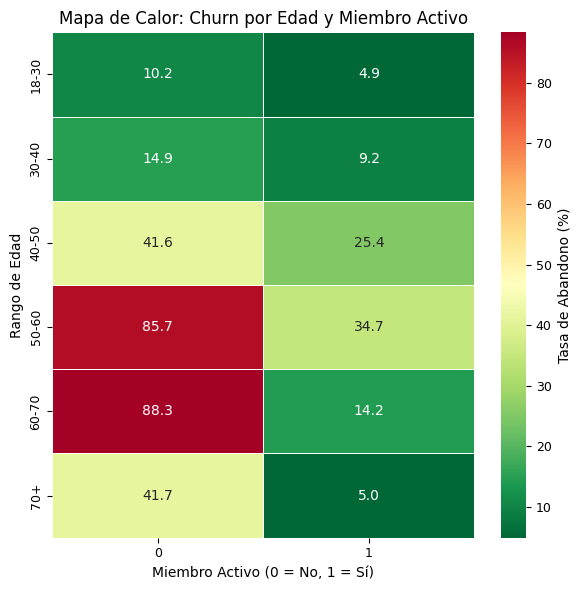

In [84]:
bins = [18, 30, 40, 50, 60, 70, 95]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70+']
datos['Age_bin'] = pd.cut(datos['Age'], bins=bins, labels=labels)

tabla_active_age = pd.pivot_table(
    datos,
    values='Churn',
    index='Age_bin',
    columns='IsActiveMember',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_active_age,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Churn por Edad y Miembro Activo')
plt.xlabel('Miembro Activo (0 = No, 1 = Sí)')
plt.ylabel('Rango de Edad')

plt.tight_layout()
plt.show()

Los mayores churn se observan en los miembros inactivos, siendo en el tramo de edad  de 50 a 70 años el mayor valor que se encuentra entre un 85 a 88% de Churn.
Le siguen las personas con mas de 70 años, con un churn de 41.7% y el tramo 40 a 50 años, con un 41.6%

En los miembros activos el mayor churn se presenta en el tramo 50 a 60 años, con un 34.7%, seguido del tramo 40 a 50 años con un 34.7%.

**Relacion entre Churn y Balance**

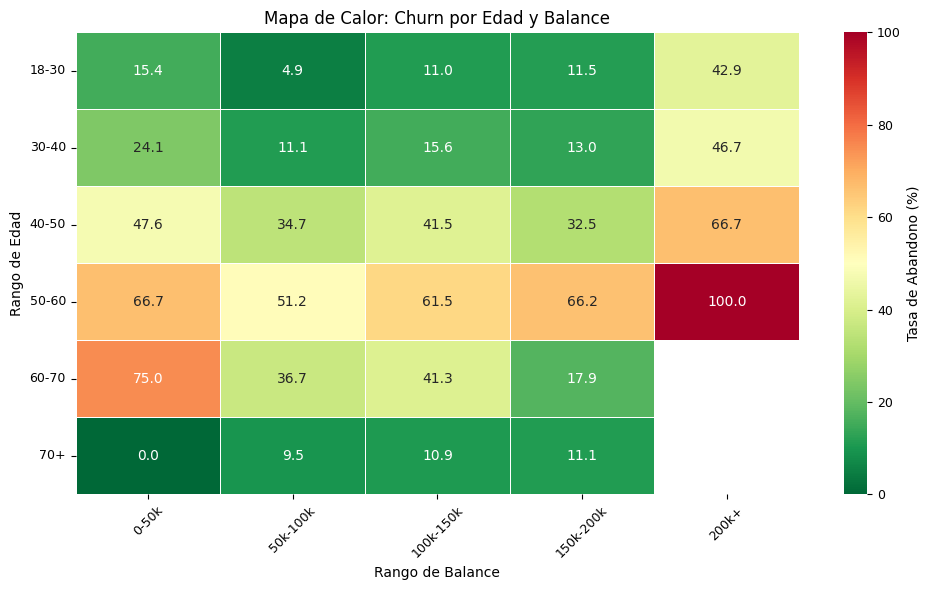

In [85]:

bins_age = [18, 30, 40, 50, 60, 70, 95]
labels_age = ['18-30', '30-40', '40-50', '50-60', '60-70', '70+']
datos['Age_bin'] = pd.cut(datos['Age'], bins=bins_age, labels=labels_age)

bins_balance = [0, 1, 50000, 100000, 150000, 200000, datos['Balance'].max()]
labels_balance = ['0', '0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
datos['Balance_bin'] = pd.cut(datos['Balance'], bins=bins_balance, labels=labels_balance)

tabla_balance_age = pd.pivot_table(
    datos,
    values='Churn',
    index='Age_bin',
    columns='Balance_bin',
    aggfunc='mean'
) * 100


plt.figure(figsize=(10, 6))
sns.heatmap(
    tabla_balance_age,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Churn por Edad y Balance')
plt.xlabel('Rango de Balance')
plt.ylabel('Rango de Edad')

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**El perfil de máximo riesgo de fuga es un cliente de entre 40 y 60 años que posee un saldo superior a $200,000.**

Luego las persona entre 60 y 70 años cn un saldo de 0 a 50.000 tiene un 75% de Churn.

### **Relacion Churn , Genero con otras variables**

**Relacion Churn, Pais, Genero**

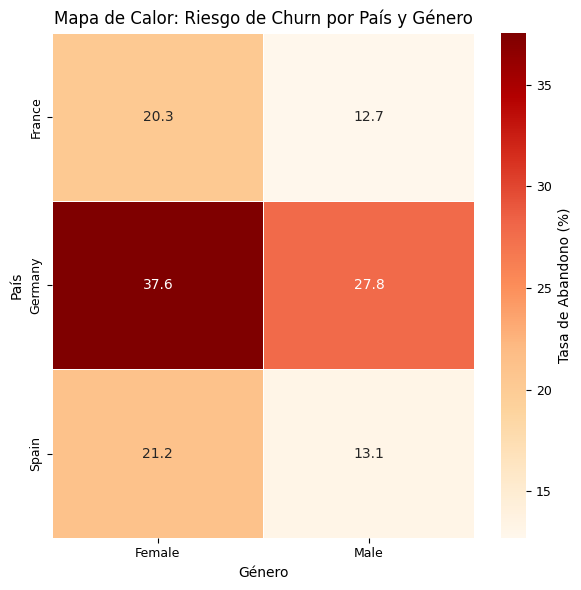

In [86]:
tabla_country_gender = pd.pivot_table(
    datos,
    values='Churn',
    index='Country',
    columns='Gender',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_country_gender,
    cmap='OrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por País y Género')
plt.xlabel('Género')
plt.ylabel('País')

plt.tight_layout()
plt.show()

No es influyente en el churn el genero con el pais, ya que el churn mas alto es de 37,6 en las mujeres de Alemania y un 27.8% para hombres.

Para España y Francia en mujeres el churn fluctua entre un 20.3 y un21.2%.
En Hmbres, en españa y Francia esta entre un 12.7 y 13.1%

**Relacion Churn, Genero, NumbersOfProducts**

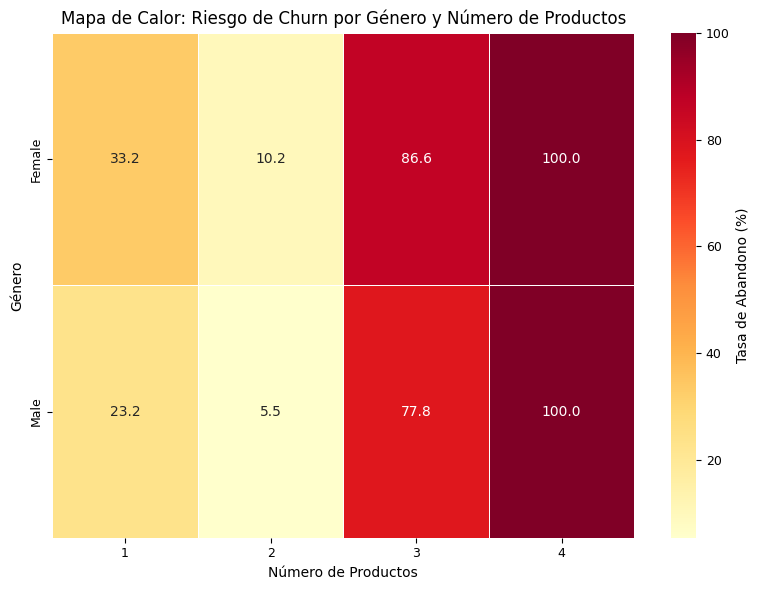

In [87]:
tabla_gender_prod = pd.pivot_table(
    datos,
    values='Churn',
    index='Gender',
    columns='NumOfProducts',
    aggfunc='mean'
) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(
    tabla_gender_prod,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por Género y Número de Productos')
plt.xlabel('Número de Productos')
plt.ylabel('Género')

plt.tight_layout()
plt.show()

Se comprueba que 3 o 4 productos , ya sea en hombres o mujeres presenta un Churn alto sobre el 77.8%.

En mujeres con un producto tambien tenemos un churn de un 33.2% y en hombre un 23,2.

El churn mas bajo es con dos productos(5.5 y 10,2%) para ambos generos

**Relacion Churn, Genero, IsActiveMember**

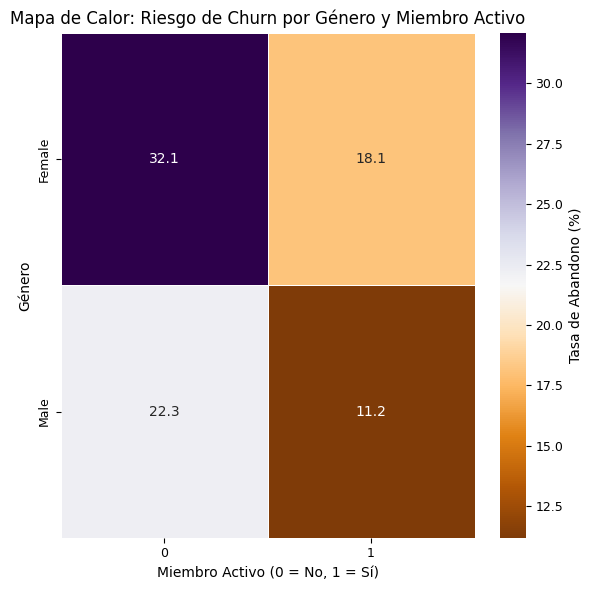

In [88]:
tabla_gender_active = pd.pivot_table(
    datos,
    values='Churn',
    index='Gender',
    columns='IsActiveMember',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_gender_active,
    cmap='PuOr',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por Género y Miembro Activo')
plt.xlabel('Miembro Activo (0 = No, 1 = Sí)')
plt.ylabel('Género')

plt.tight_layout()
plt.show()

Mujeres no activa presenten el churn mas alto con un 32.1%.
En hombre tambien el churn es alto en miembros no activos, con un 22.3%

**Relacion entre Genero, Balance y Churn**

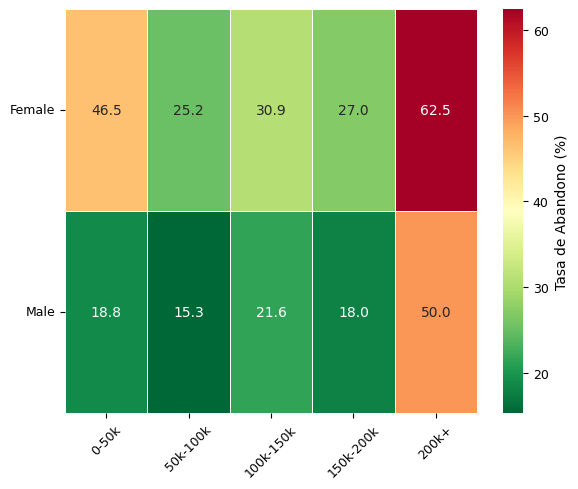

In [89]:
bins_balance = [0, 1, 50000, 100000, 150000, 200000, datos['Balance'].max()]
labels_balance = ['0', '0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

datos['Balance_bin'] = pd.cut(
    datos['Balance'],
    bins=bins_balance,
    labels=labels_balance
)

heatmap_data = pd.pivot_table(
    datos,
    values='Churn',
    index='Gender',
    columns='Balance_bin',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


Los saldos altos presentan el mayor churn, un 62.5% en mujeres y un 50% en hombres. En todo caso el mayor churn es en mujeres que en hombres

## **Relacion entre Pais, Churn y Otras variables**

**Relacion entre Pais, Churn y NumbersOfProducts**

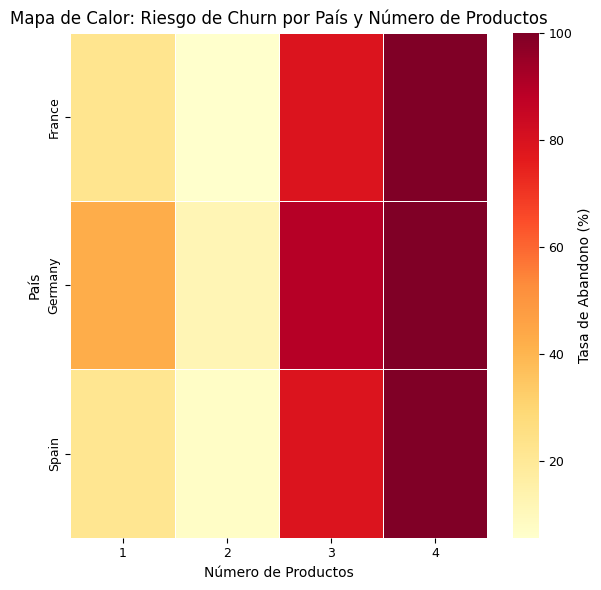

In [90]:
tabla_country_prod = pd.pivot_table(
    datos,
    values='Churn',
    index='Country',
    columns='NumOfProducts',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_country_prod,
    cmap='YlOrRd',
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por País y Número de Productos')
plt.xlabel('Número de Productos')
plt.ylabel('País')

plt.tight_layout()
plt.show()

Se repite la tendencia que 3 o 4 productos presenta alto churn en cualquiera de los paises. ademas, en Alemania 1 producto tambien es causal de alto churn , con un 42.8%

**Relacion entre pais, Churn IsActiveMembers**

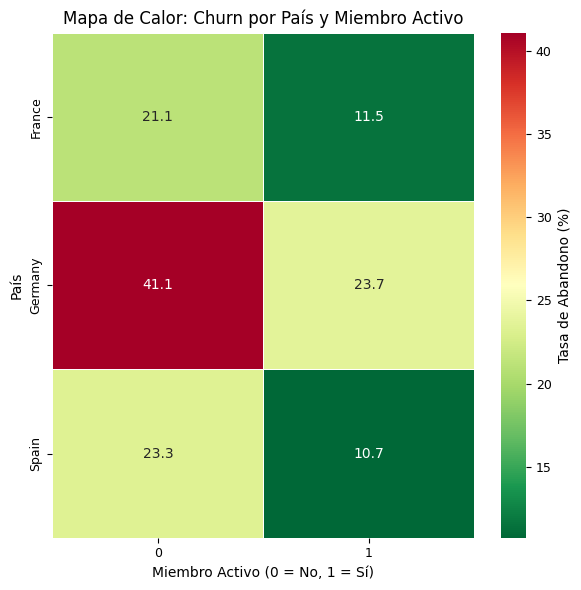

In [91]:
tabla_country_active = pd.pivot_table(
    datos,
    values='Churn',
    index='Country',
    columns='IsActiveMember',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_country_active,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Churn por País y Miembro Activo')
plt.xlabel('Miembro Activo (0 = No, 1 = Sí)')
plt.ylabel('País')

plt.tight_layout()
plt.show()

Los miembros activos presentan bajo churn, en los tres paises, siendo mas alto en alemania (23.7%).

Los miembros inactivos en Alemania presentan el mayor churn con un 41.1%


**Relacion entre Churn, Country y Balance**

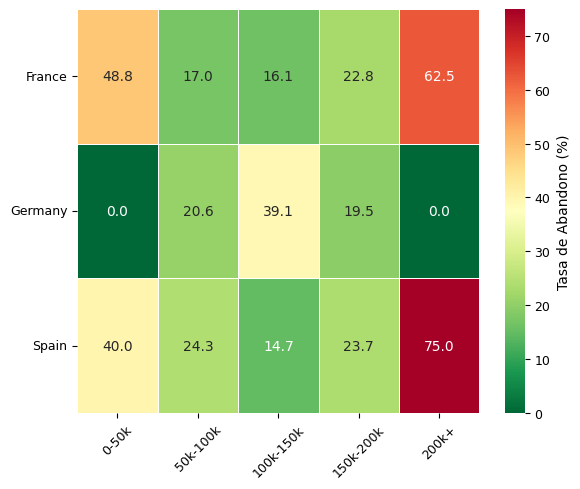

In [92]:
bins_balance = [0, 1, 50000, 100000, 150000, 200000, datos['Balance'].max()]
labels_balance = ['0', '0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

datos['Balance_bin'] = pd.cut(
    datos['Balance'],
    bins=bins_balance,
    labels=labels_balance
)

# Pivot: tasa de churn (%)
heatmap_data = pd.pivot_table(
    datos,
    values='Churn',
    index='Country',
    columns='Balance_bin',
    aggfunc='mean'
) * 100

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


En el caso de Francia, hay un 48.8% de churn en saldo entre 0 y 50.000 y un 62.5% en los saldos altos 200.000 y mas.

Para Alemania , el churn se produce en los saldos medios entre 100 y 150.000 euros, con un 39.1%, y hay 0% de churn el los extremos ,entre 0 y 50.000 y sobre los 200.000 euros.

Para España, la fuga de clientes en alta en saldo altos, sobre 200.000 euros, con un 75% de Churn, seguido de los saldos bajos(0-50) con un 40% de abandono.

**Relacion entre Churn, NumOfProducts, IsactiveMembers**

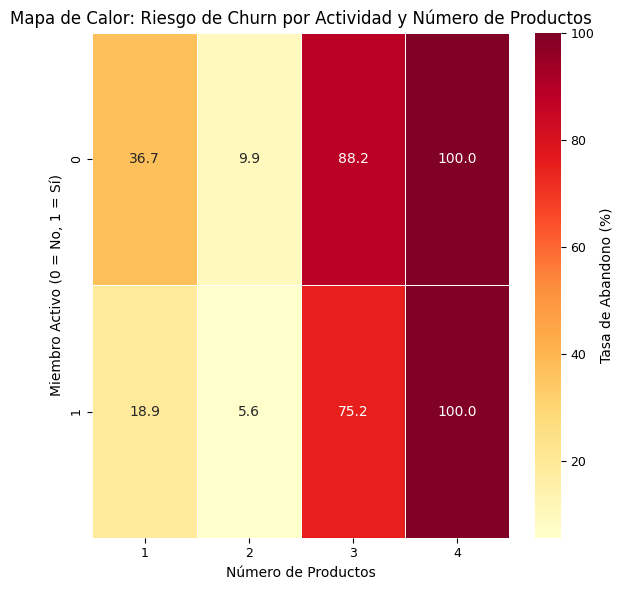

In [93]:
tabla_prod_active = pd.pivot_table(
    datos,
    values='Churn',
    index='IsActiveMember',
    columns='NumOfProducts',
    aggfunc='mean'
) * 100

plt.figure(figsize=(6, 6))
sns.heatmap(
    tabla_prod_active,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.title('Mapa de Calor: Riesgo de Churn por Actividad y Número de Productos')
plt.xlabel('Número de Productos')
plt.ylabel('Miembro Activo (0 = No, 1 = Sí)')

plt.tight_layout()
plt.show()

Donde se produce el menor churn es con dos productos, tanto para los clientes activos , como inactivos.

El mayor churn es en 3 o 4 productos con un churn sobre el 75%, para ambos tipos de clientes

**Relacion entre Churn NumOfProducts, y Balance**

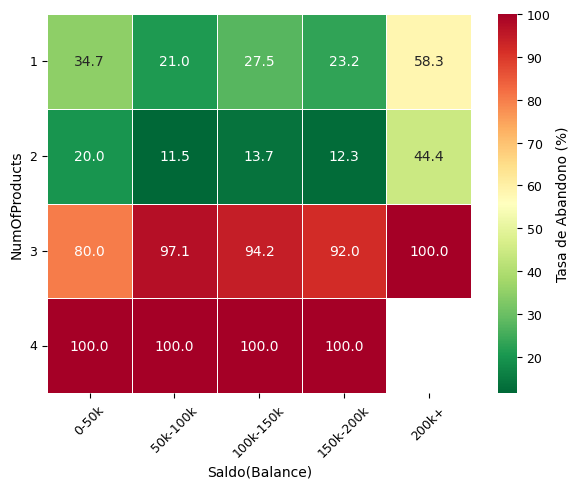

In [94]:
bins_balance = [0, 1, 50000, 100000, 150000, 200000, datos['Balance'].max()]
labels_balance = ['0', '0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

datos['Balance_bin'] = pd.cut(
    datos['Balance'],
    bins=bins_balance,
    labels=labels_balance
)

# Pivot: tasa de churn (%)
heatmap_data = pd.pivot_table(
    datos,
    values='Churn',
    index='NumOfProducts',
    columns='Balance_bin',
    aggfunc='mean'
) * 100

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.xlabel('Saldo(Balance)')
plt.ylabel('NumOfProducts')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


Se confirma nuevamente que 3 o 4 productos, produce un alto churn , entre un 80 a 100%, en todos los niveles de saldo.

Para 1 o 2 productos, se produce un alto churn en los saldos altos de 200.000 euros hacia arriba, entre un 44 a 58% de churn.


**Relacion entre Churn, IsactiveMember y Balance**

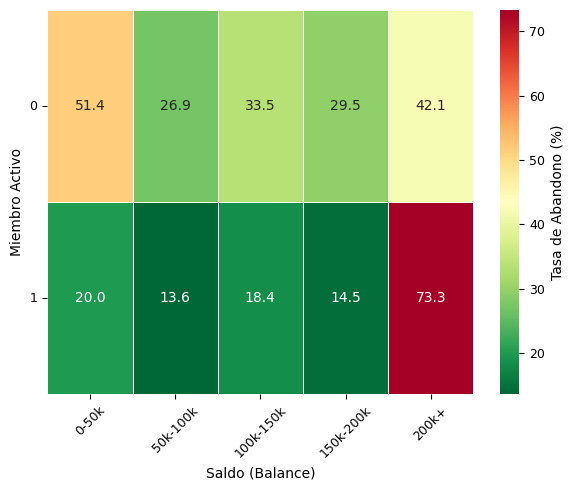

In [95]:
bins_balance = [0, 1, 50000, 100000, 150000, 200000, datos['Balance'].max()]
labels_balance = ['0', '0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

datos['Balance_bin'] = pd.cut(
    datos['Balance'],
    bins=bins_balance,
    labels=labels_balance
)

# Pivot: tasa de churn (%)
heatmap_data = pd.pivot_table(
    datos,
    values='Churn',
    index='IsActiveMember',
    columns='Balance_bin',
    aggfunc='mean'
) * 100

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'Tasa de Abandono (%)'}
)

plt.xlabel('Saldo (Balance)')
plt.ylabel('Miembro Activo')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


El mayor churn (73.3%) se produce en clientes activos con saldos altos (200.000 y mas).
En miembros inactivos, tenemos churn entre 26.9 a 51.4% de churn, en todos los segmentos del saldo.

<font color=blue size = 5>**Conclusiones sobre Relacion entre variables**</font>

**Edad y Genero:**
Se observa un mayor churn en mujeres entre 40 a 70 años (38.8 a 65.2%).

Para hombres, el mayor churn es entre 50 y 60 años , con un 47.5%

**Edad y Pais**:Las edades entre 40 y 70 años presentan mayor churn, siendo entre 50 y 60 años para Alemania un churn de 69.5% , luego Francia con un 52.6% para el mismo tramo de edad.

Para el tramo entre 40 y 50 años, Alemania presenta un 48.8% de churn , seguido de España con un 28.1 y Francia con un 27.3%.

Para el tramo 60 a 70 años, se repite algo similar, Alemania con un churn de 50%, Francia, un 26.1 y España un 24.4%.

**Edad y NumOfProductos**: ste gráfico confirma que el Número de Productos es el predictor de abandono más potente, pero su efecto se ve peligrosamente multiplicado por la Edad.

Cualquier edad y con 4 productos hay un 100% de Churn Edad entre 50 a 60 años y 3 productos hay un 97,9% de churn. En esta misma edad con 1 producto , tiene un 63,8% de Churn.

**Edad y IsActiveMember**:Los mayores churn se observan en los miembros inactivos, siendo en el tramo de edad de 50 a 70 años el mayor valor que se encuentra entre un 85 a 88% de Churn. Le siguen las personas con mas de 70 años, con un churn de 41.7% y el tramo 40 a 50 años, con un 41.6%

En los miembros activos el mayor churn se presenta en el tramo 50 a 60 años, con un 34.7%, seguido del tramo 40 a 50 años con un 34.7%.

**Edad y Balance:**: El perfil de máximo riesgo de fuga es un cliente de entre 40 y 60 años que posee un saldo superior a $200,000.

Luego las persona entre 60 y 70 años cn un saldo de 0 a 50.000 tiene un 75% de Churn.


**Genero y Pais**:No es influyente en el churn el genero con el pais, ya que el churn mas alto es de 37,6 en las mujeres de Alemania y un 27.8% para hombres.

Para España y Francia en mujeres el churn fluctua entre un 20.3 y un21.2%. En Hmbres, en españa y Francia esta entre un 12.7 y 13.1%

**Genero y NumOfProductos**: Se comprueba que 3 o 4 productos , ya sea en hombres o mujeres presenta un Churn alto sobre el 77.8%.

En mujeres con un producto tambien tenemos un churn de un 33.2% y en hombre un 23,2.

El churn mas bajo es con dos productos(5.5 y 10,2%) para ambos generos

**Genero y IsActiveMember**:Mujeres no activa presenten el churn mas alto con un 32.1%. En hombre tambien el churn es alto en miembros no activos, con un 22.3%

**Genero y Balance:**Los saldos altos presentan el mayor churn, un 62.5% en mujeres y un 50% en hombres. En todo caso el mayor churn es en mujeres que en hombres


**Pais y NumOfProductos**: Se repite la tendencia que 3 o 4 productos presenta alto churn en cualquiera de los paises. ademas, en Alemania 1 producto tambien es causal de alto churn , con un 42.8%

**Pais y IsActiveMember**:Los miembros activos presentan bajo churn, en los tres paises, siendo mas alto en alemania (23.7%).

Los miembros inactivos en Alemania presentan el mayor churn con un 41.1%

**Pais y Balance:**: En el caso de Francia, hay un 48.8% de churn en saldo entre 0 y 50.000 y un 62.5% en los saldos altos 200.000 y mas.

Para Alemania , el churn se produce en los saldos medios entre 100 y 150.000 euros, con un 39.1%, y hay 0% de churn el los extremos ,entre 0 y 50.000 y sobre los 200.000 euros.

Para España, la fuga de clientes en alta en saldo altos, sobre 200.000 euros, con un 75% de Churn, seguido de los saldos bajos(0-50) con un 40% de abandono.


**NumOfProducts y IsActiveMember**:Donde se produce el menor churn es con dos productos, tanto para los clientes activos , como inactivos.

El mayor churn es en 3 o 4 productos con un churn sobre el 75%, para ambos tipos de clientes

**NumOfProducts y Balance**:Se confirma nuevamente que 3 o 4 productos, produce un alto churn , entre un 80 a 100%, en todos los niveles de saldo.

Para 1 o 2 productos, se produce un alto churn en los saldos altos de 200.000 euros hacia arriba, entre un 44 a 58% de churn.

**IsActiveMember y Balance**:El mayor churn (73.3%) se produce en clientes activos con saldos altos (200.000 y mas).
En miembros inactivos, tenemos churn entre 26.9 a 51.4% de churn, en todos los segmentos del saldo.




 <font color=blue size = 5>**Insigths Encontrados**</font>

Los insigths encontrados son los siguientes:

**NumOfProducts (NÚMERO DE PRODUCTOS) — EL FACTOR MÁS CRÍTICO**

- Es el predictor más potente del churn, y su efecto se dispara al combinarse con otras variables. 3 o 4 productos presentan un churn entre 75% y 100%
- Se repite en todos los países, géneros, edades, balances y estados de actividad
- 4 productos = 100% de churn en todas las edades. Incluso en clientes activos.

- NumOfProducts es la variable Nº1 para el Banco Alura

**Edad — FACTOR ESTRUCTURAL QUE MULTIPLICA EL RIESGO**

La edad no actúa sola, pero potencia brutalmente el churn cuando se combina con otras variables.

**Tramos críticos recurrentes:**

 - 40 a 70 años, especialmente:

 - 50 a 60 años (pico máximo): En ese tramo:

  - Churn alto con 1 producto

  - Churn extremo con 3 o 4 productos

  - Churn muy alto si además no es activo

La  Edad es un amplificador del riesgo: clientes maduros + fricción = abandono casi seguro.

**IsActiveMember — PROTECTOR CLAVE, PERO NO ABSOLUTO**

Ser activo reduce el churn, pero no lo elimina cuando hay otras señales de riesgo.

Los patrones encontrados son:

  - Inactivos (50 a 70 años)  presenta un churn 85 a 88%

  -  Los clientes inactivos en cualquier país y balance → churn consistentemente alto

  -  Los clientes Activos con saldo alto (>200k) presentan un  churn 73.3%

En resumen, la actividad protege solo si no coexisten señales críticas como saldo alto o muchos productos.

**Balance — SEÑAL DE RIESGO NO LINEAL**

El churn no crece linealmente con el saldo, pero los saldos altos son peligrosos, sobre todo combinados con edad y numero de productos.

Los hallazgos encontrados son:

Clientes con saldo sobre 200.000:

  - Mujeres: 62.5% churn

  - Hombres: 50% churn

  - España: 75% churn

  - Clientes activos: 73.3% churn

En Francia: Bajo saldo (0a 50k) y saldo alto presentan un churn alto

Alemania: Riesgo concentrado en saldos medios (100–150k)

En Conclusión:

**Los clientes de alto valor económico son paradójicamente los más propensos a irse.**

**País — MODERADOR DEL CHURN**

Insight clave: - El país no genera churn por sí solo, pero modula fuertemente la intensidad del riesgo.

Patrones claros encontrados:

Alemania: El churn más alto en casi todas las combinaciones

Especialmente:

  - 50–60 años

  - 1 producto

  -  Clientes Inactivos

Francia y España: Churn más moderado, salvo en saldos altos

Conclusión:  Alemania requiere estrategias específicas de retención.

**Género — EFECTO SECUNDARIO PERO CONSISTENTE**

Insight clave:  El género no es detonante, pero las mujeres presentan sistemáticamente mayor churn en escenarios de riesgo.

Evidencia:

Mujeres:

  - Mayor churn en edades 40–70

  - Mayor churn con saldos altos

  - Mayor churn como inactivas

En  Conclusión:  Género actúa como variable de ajuste fino, no como driver principal.

**RESUMEN**

Las variables que tienen un impacto en el churn, son:

  - NumOfProducts
  - Edad
  - IsActiveMember
  - Balance
  - País
  - Género

**EL PERFIL DE MAXIMO RIESGO PARA EL CHURN**

**Cliente de 50 a 60 años, con 3 o más productos, saldo alto, no activo, especialmente en Alemania.**

 <font color=blue size = 5>**7. Dataframe para Predicciones**</font>

En el repositorio de Git Hub: https://github.com/Gameto2025/Banco_Alura/tree/main, se encuentra el dataframe, listo para ser utilizado en la siguiente tarea que es la creacion de modelos de predictivos  con Machine Learning, para poder predecir los clientes que pueden abandonar y asi tomar medidas antes que eso ocurra.